# Data Exploration to grasp how different sets of parameters and dimentions of the hypercube work together

In [42]:
from copy import copy, deepcopy
import matplotlib.pyplot as plt
import csv
import numpy as np
from dataclasses import dataclass
import pandas as pd

In [43]:
fieldnames = ["entries", "size", "max_entries", "d", "n", "ecd_time", "ecd_size", "query_gen_time", "query_size", "answer_gen_time", "answer_size", "answer_get_time", "tot_time", "online_time", "leakedBits", "informationBits"]
path = "pirGoWP.csv"


In [44]:
# load data
df = pd.read_csv(path)
print(df)
all_max_entries = df['max_entries'].unique()
all_entries = df['entries'].unique()
all_sizes = df['size'].unique()
all_N = df['n'].unique()
all_D = df['d'].unique()

      entries  size  max_entries  d   n   ecd_time  ecd_size  query_gen_time  \
0       16384    30      1048576  2  12   0.218646     10141        0.001302   
1       16384    30      1048576  2  13   0.265088     14659        0.002660   
2       16384    30      1048576  2  14   0.435506     19856        0.004596   
3       16384    30      1048576  3  12   0.074486      2467        0.001294   
4       16384    30      1048576  3  13   0.096911      4307        0.002276   
..        ...   ...          ... ..  ..        ...       ...             ...   
633  16777216   288     16777216  4  13  46.467695    182877        0.002548   
634  16777216   288     16777216  4  14  46.589394    463572        0.003746   
635  16777216   288     16777216  5  12  56.643016      4131        0.001272   
636  16777216   288     16777216  5  13  56.358460     65906        0.002541   
637  16777216   288     16777216  5  14  56.098563    236073        0.003762   

     query_size  answer_gen_time  answe

In [45]:
def filter_by_attribs(df : pd.DataFrame, attribs: [str], values: [any])->pd.DataFrame:
    for a,v in zip(attribs, values):
        df = df[df[a] == v]
    return df

## For a given worst case size, for a given actual db num of entries, for a given db item size, how the different combinations of BFV params and Hypercube Dimention perform?

/tmp/ipykernel_14966/606225313.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(4, figsize=(30,10))


<Figure size 640x480 with 0 Axes>

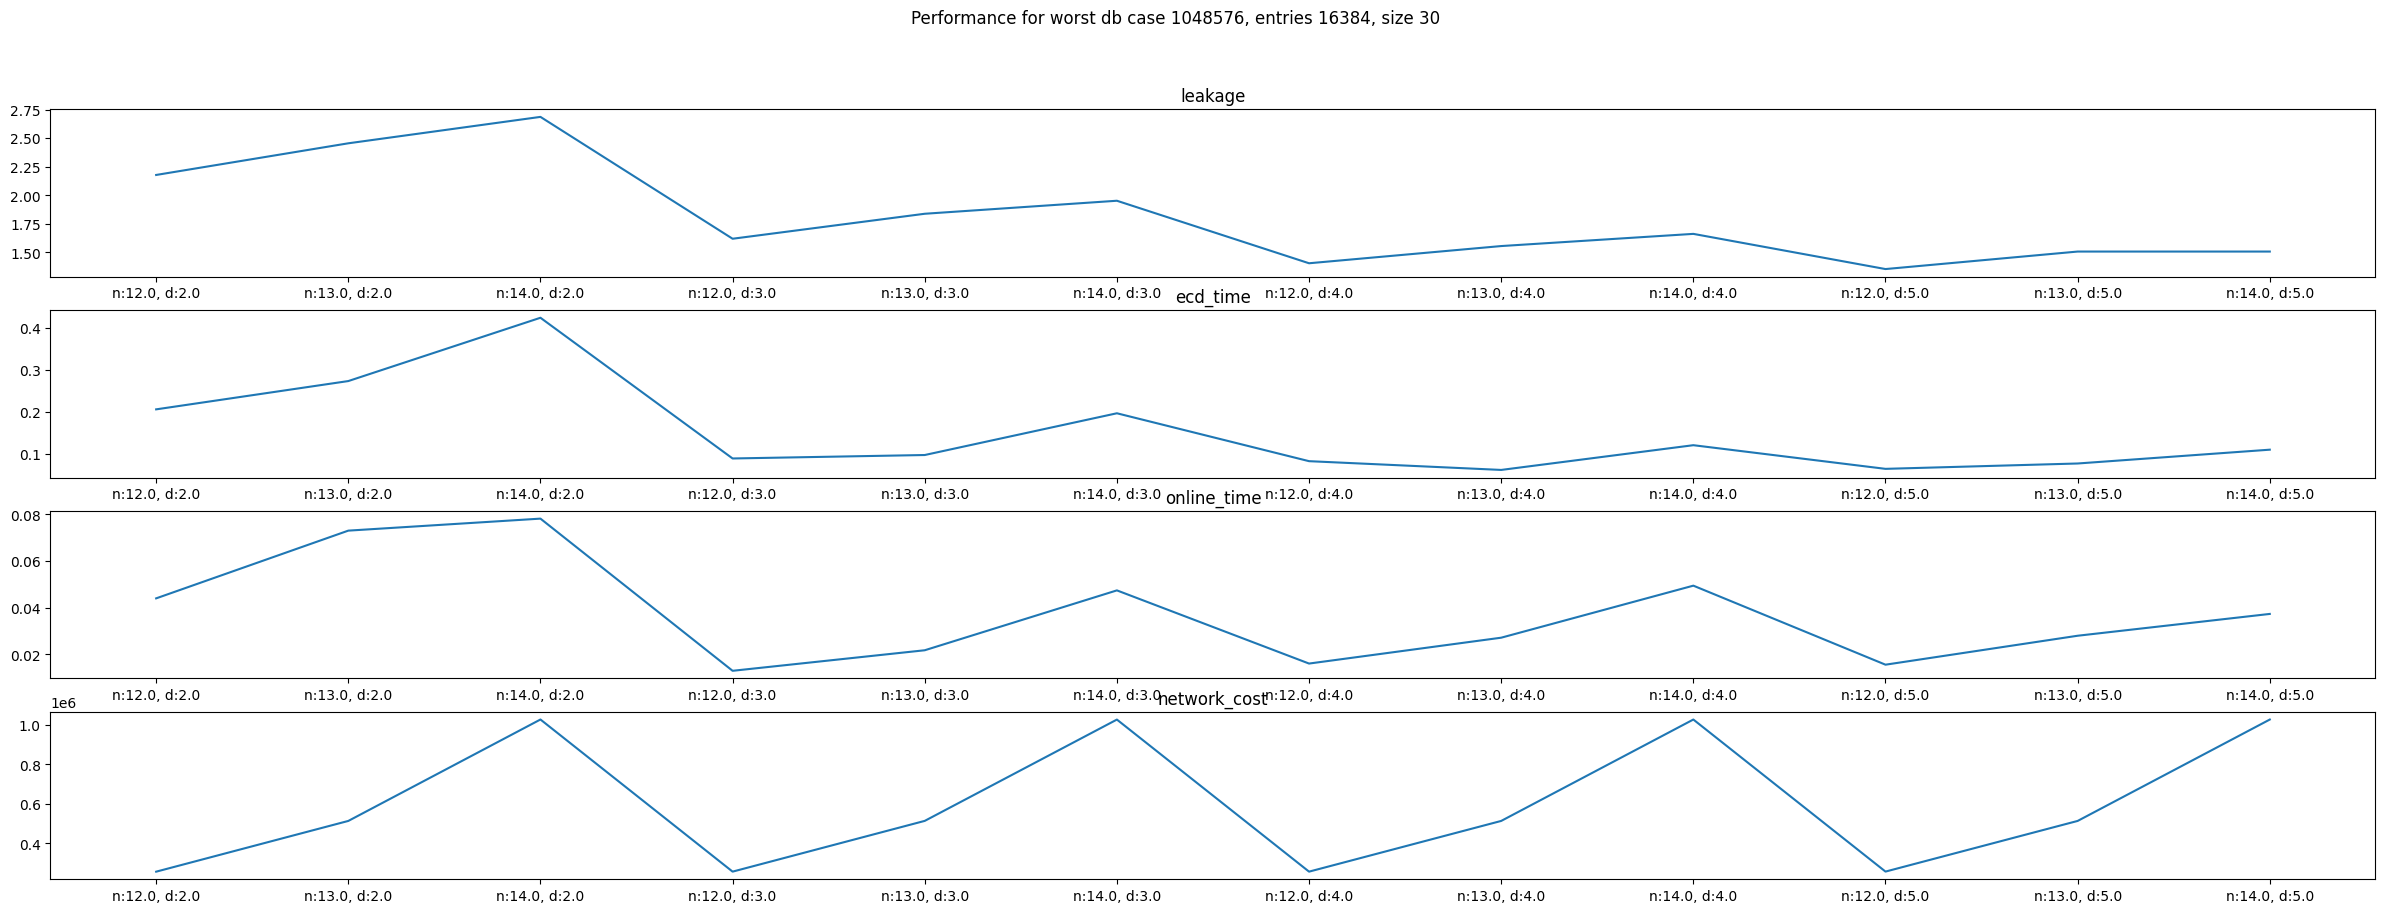

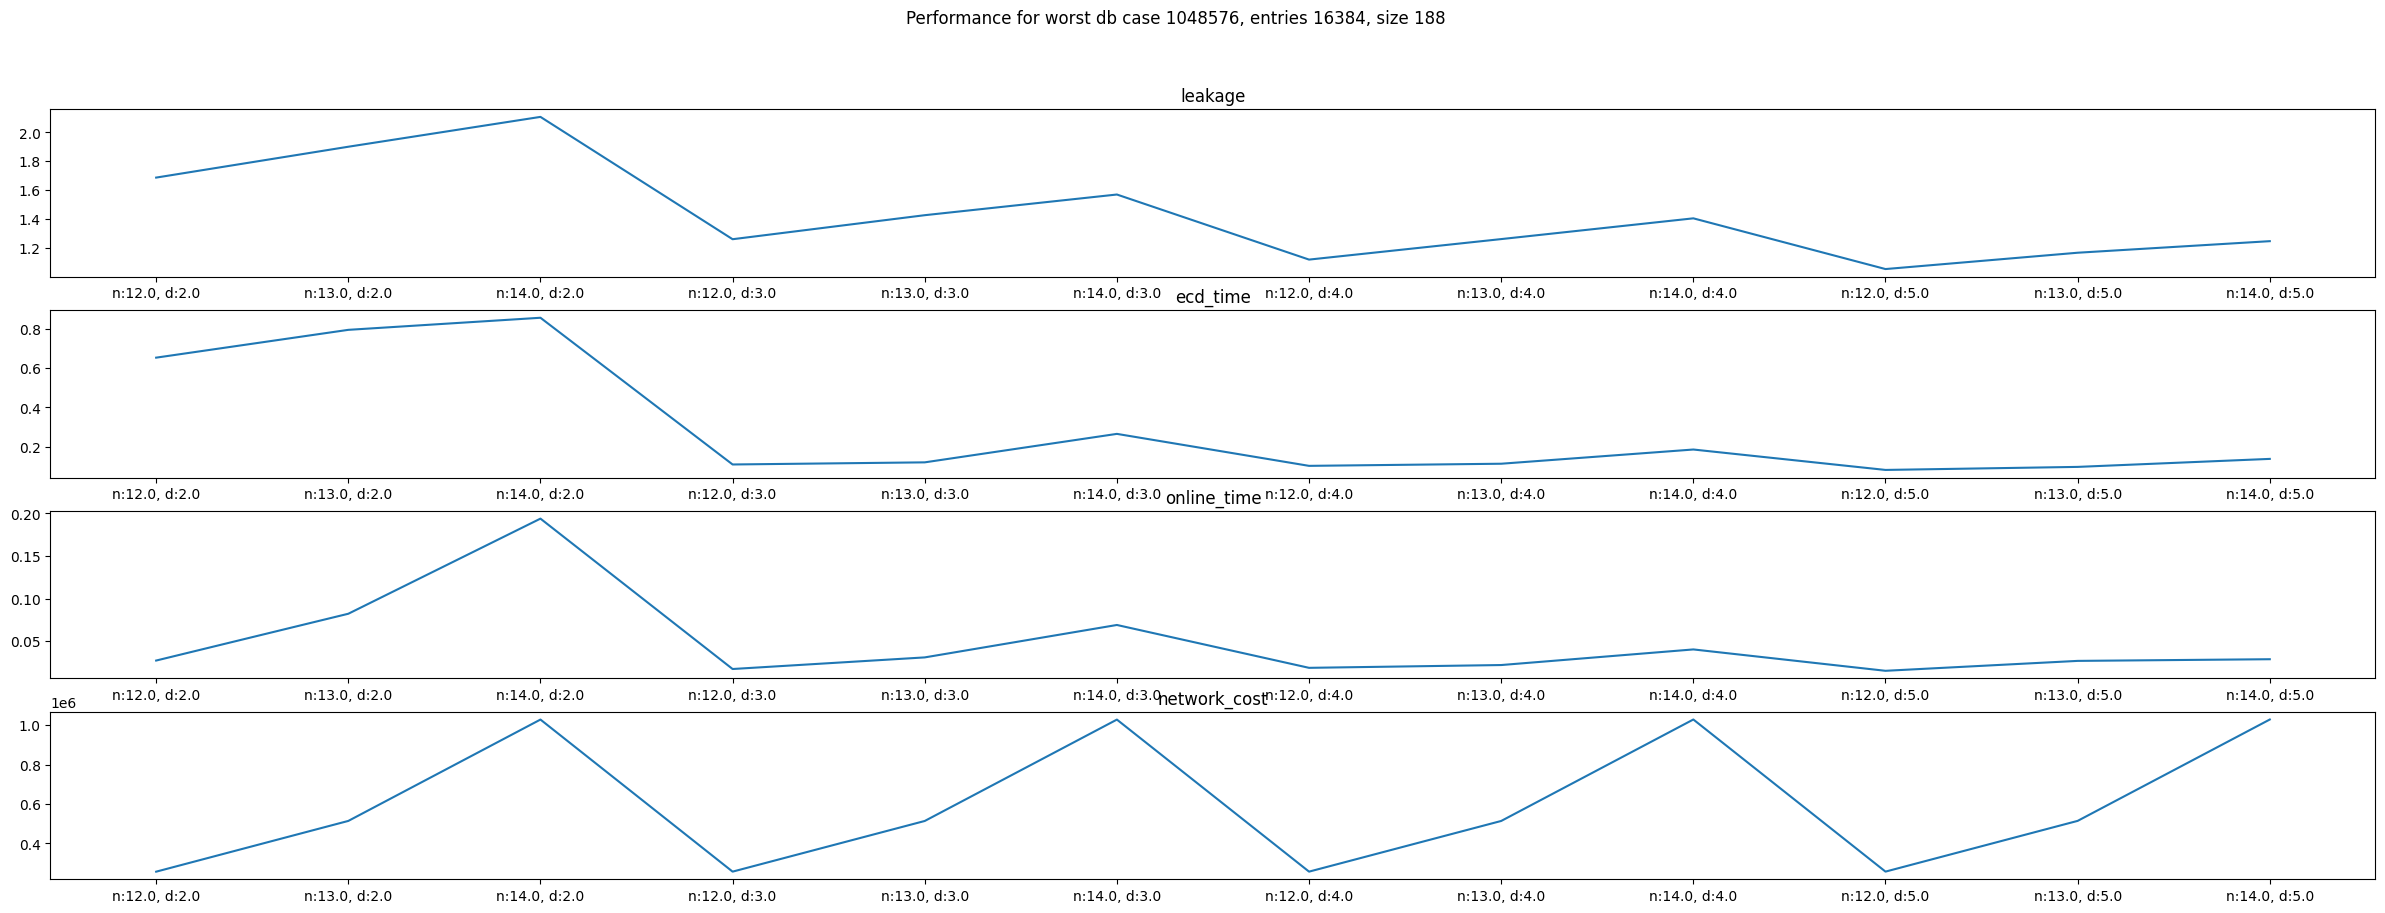

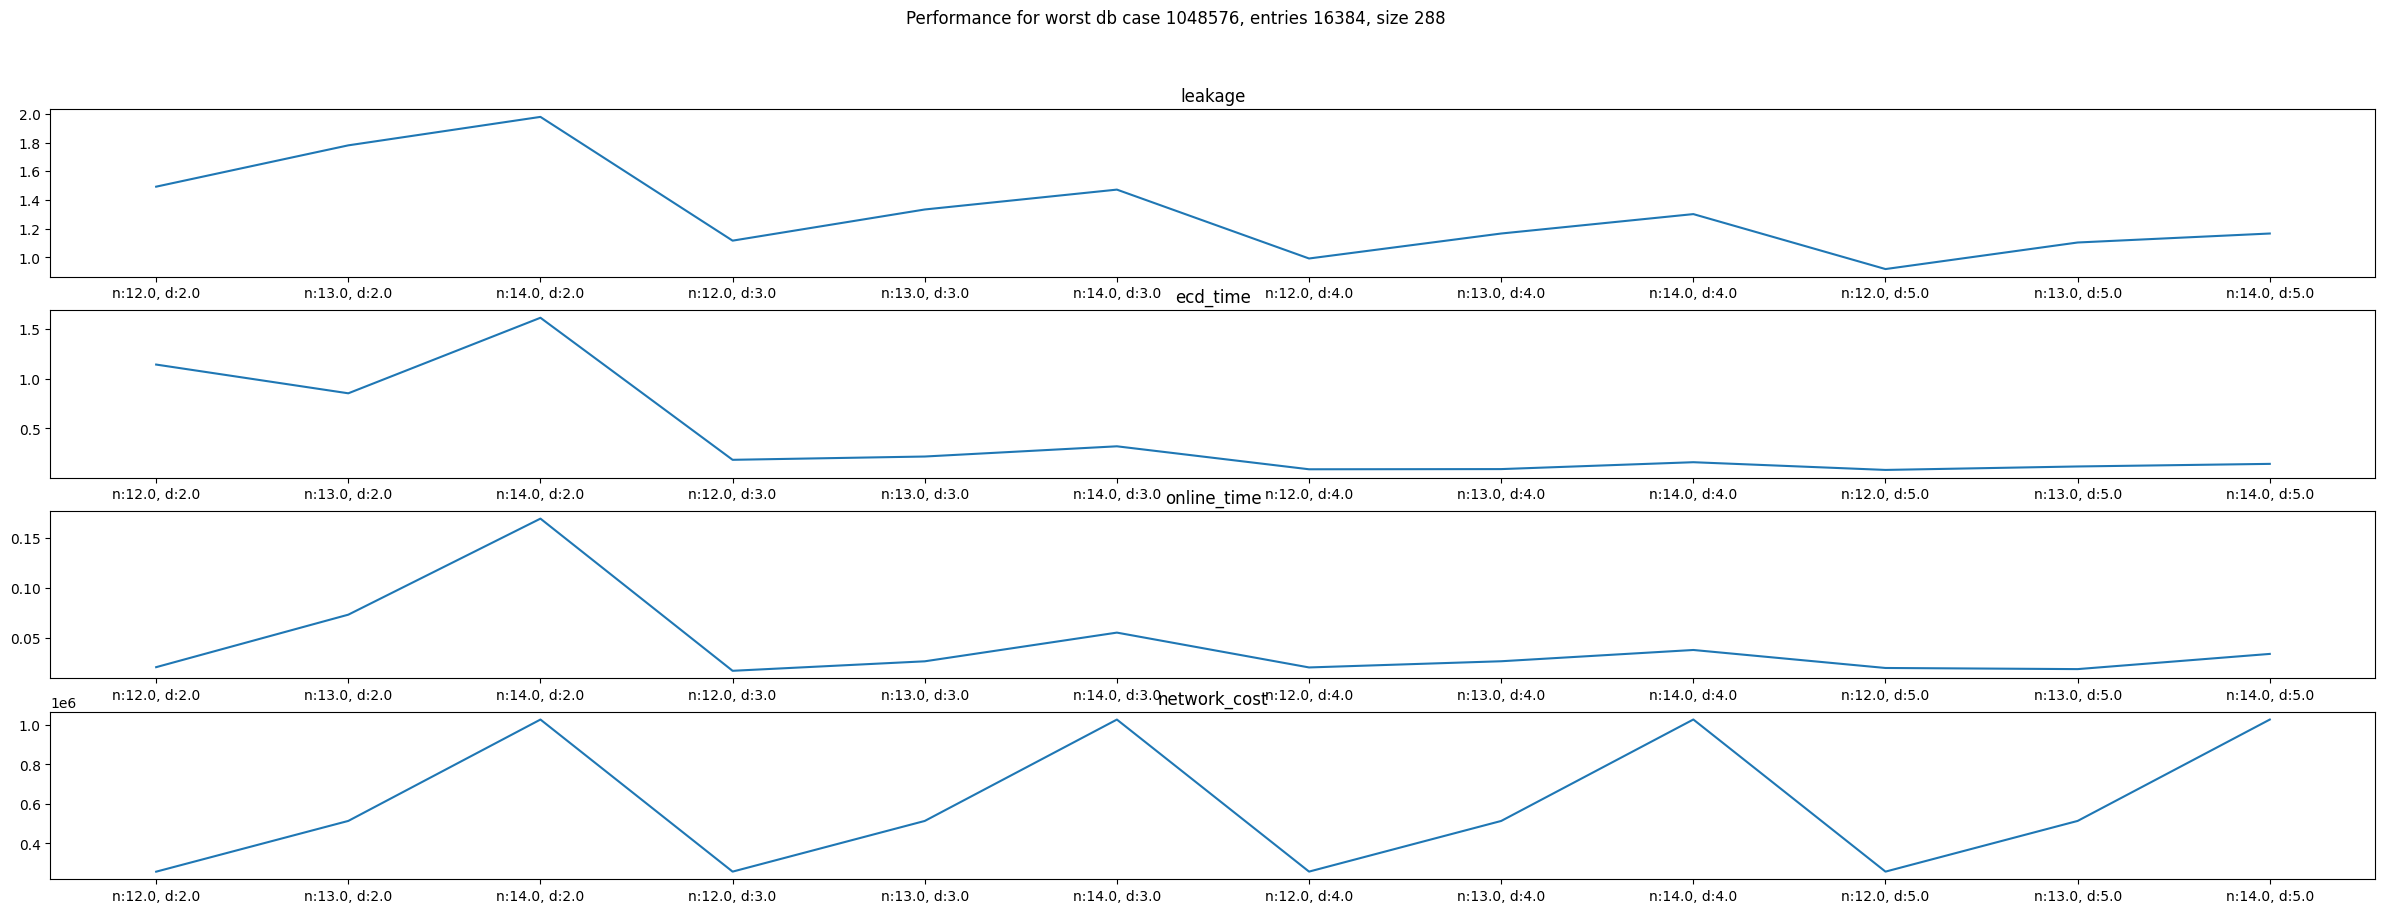

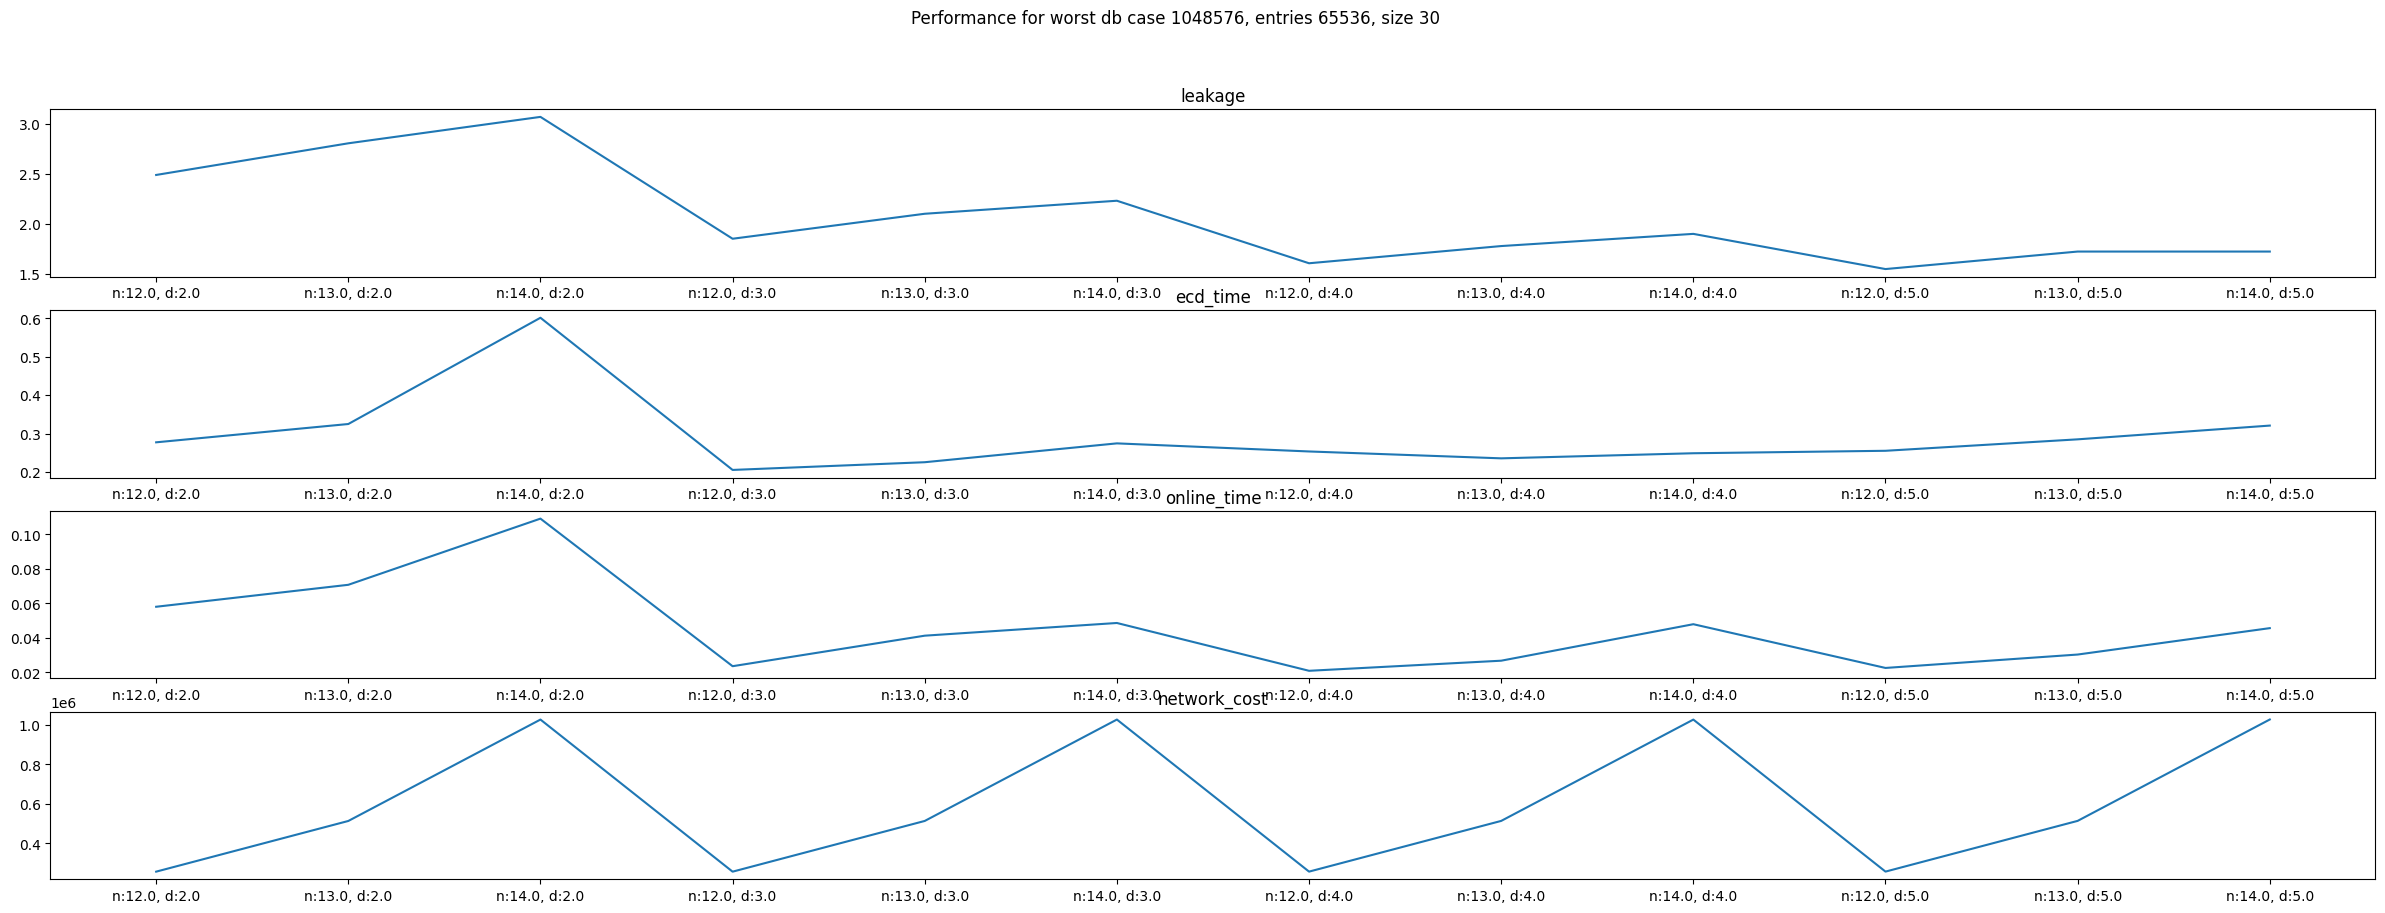

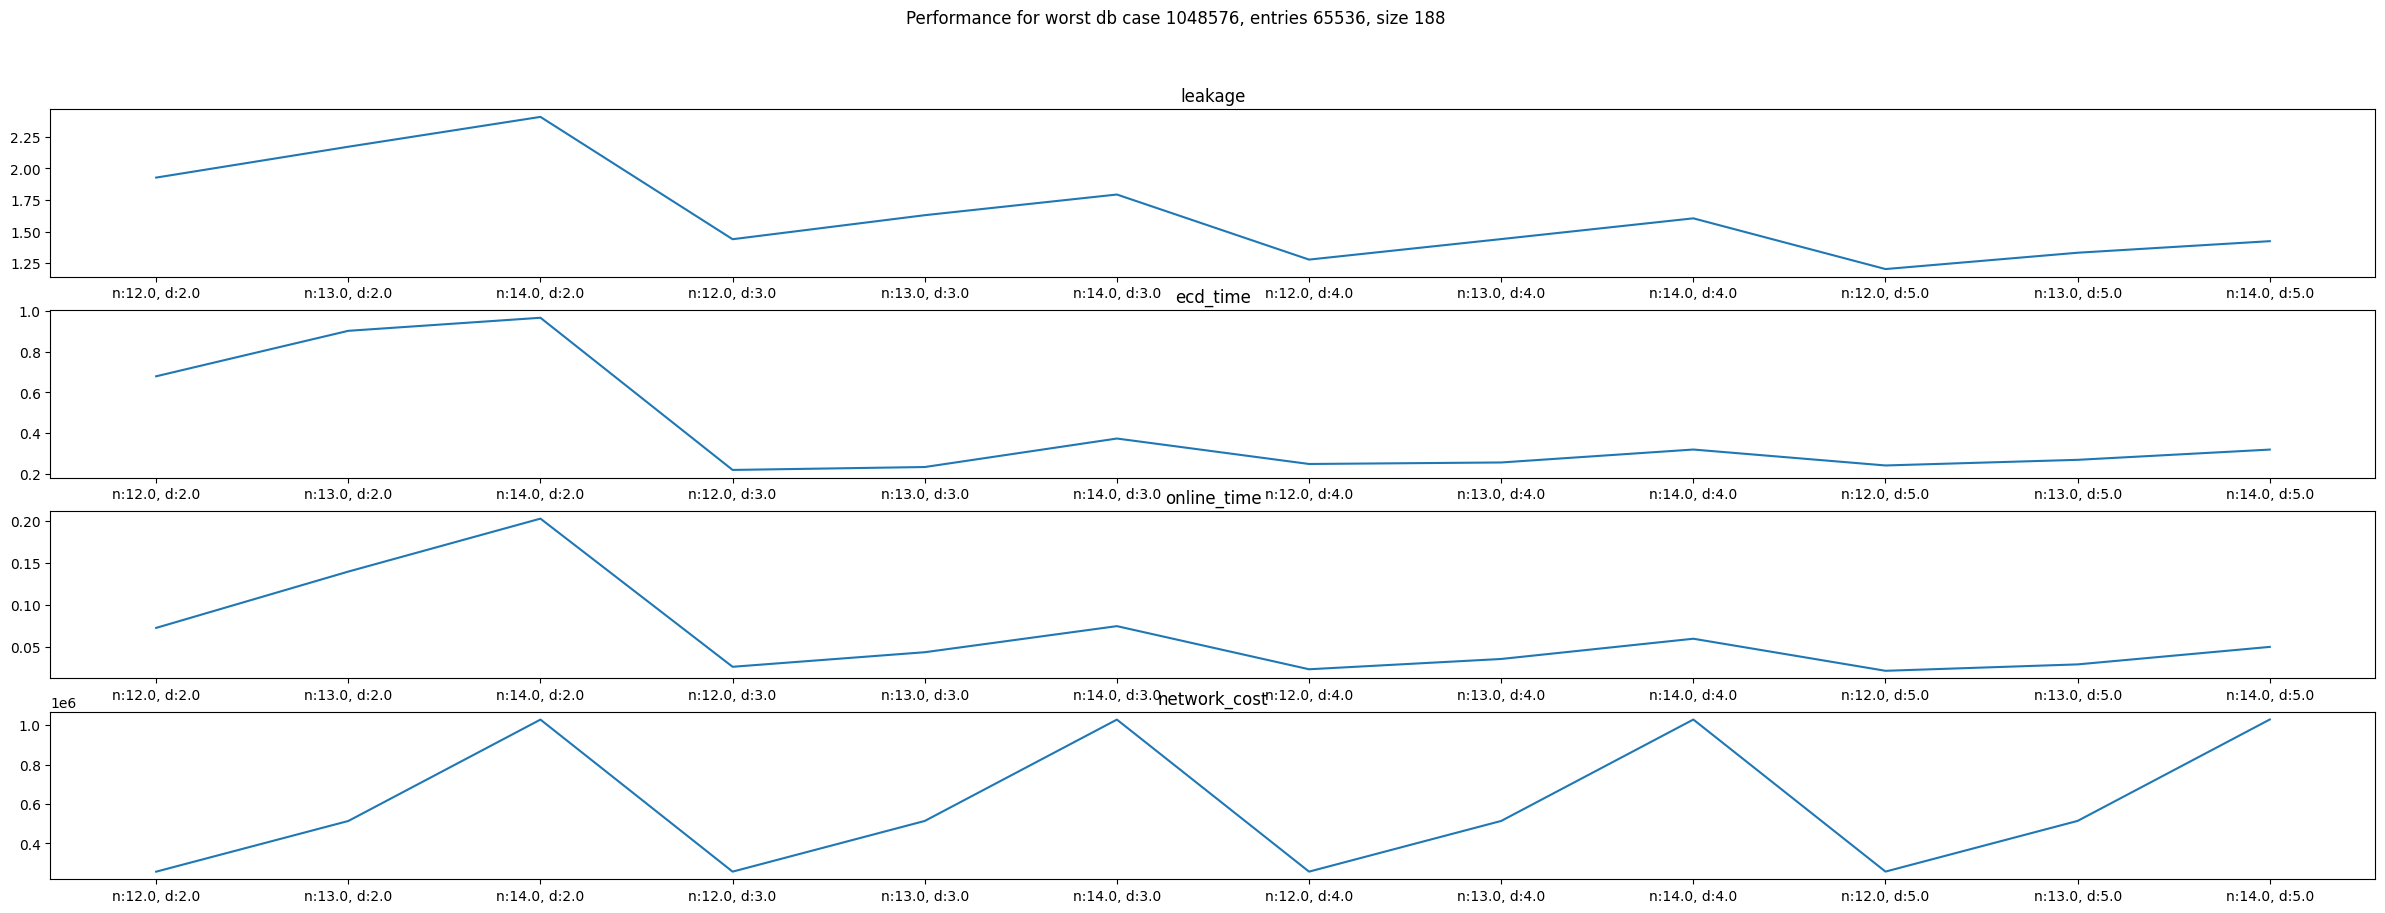

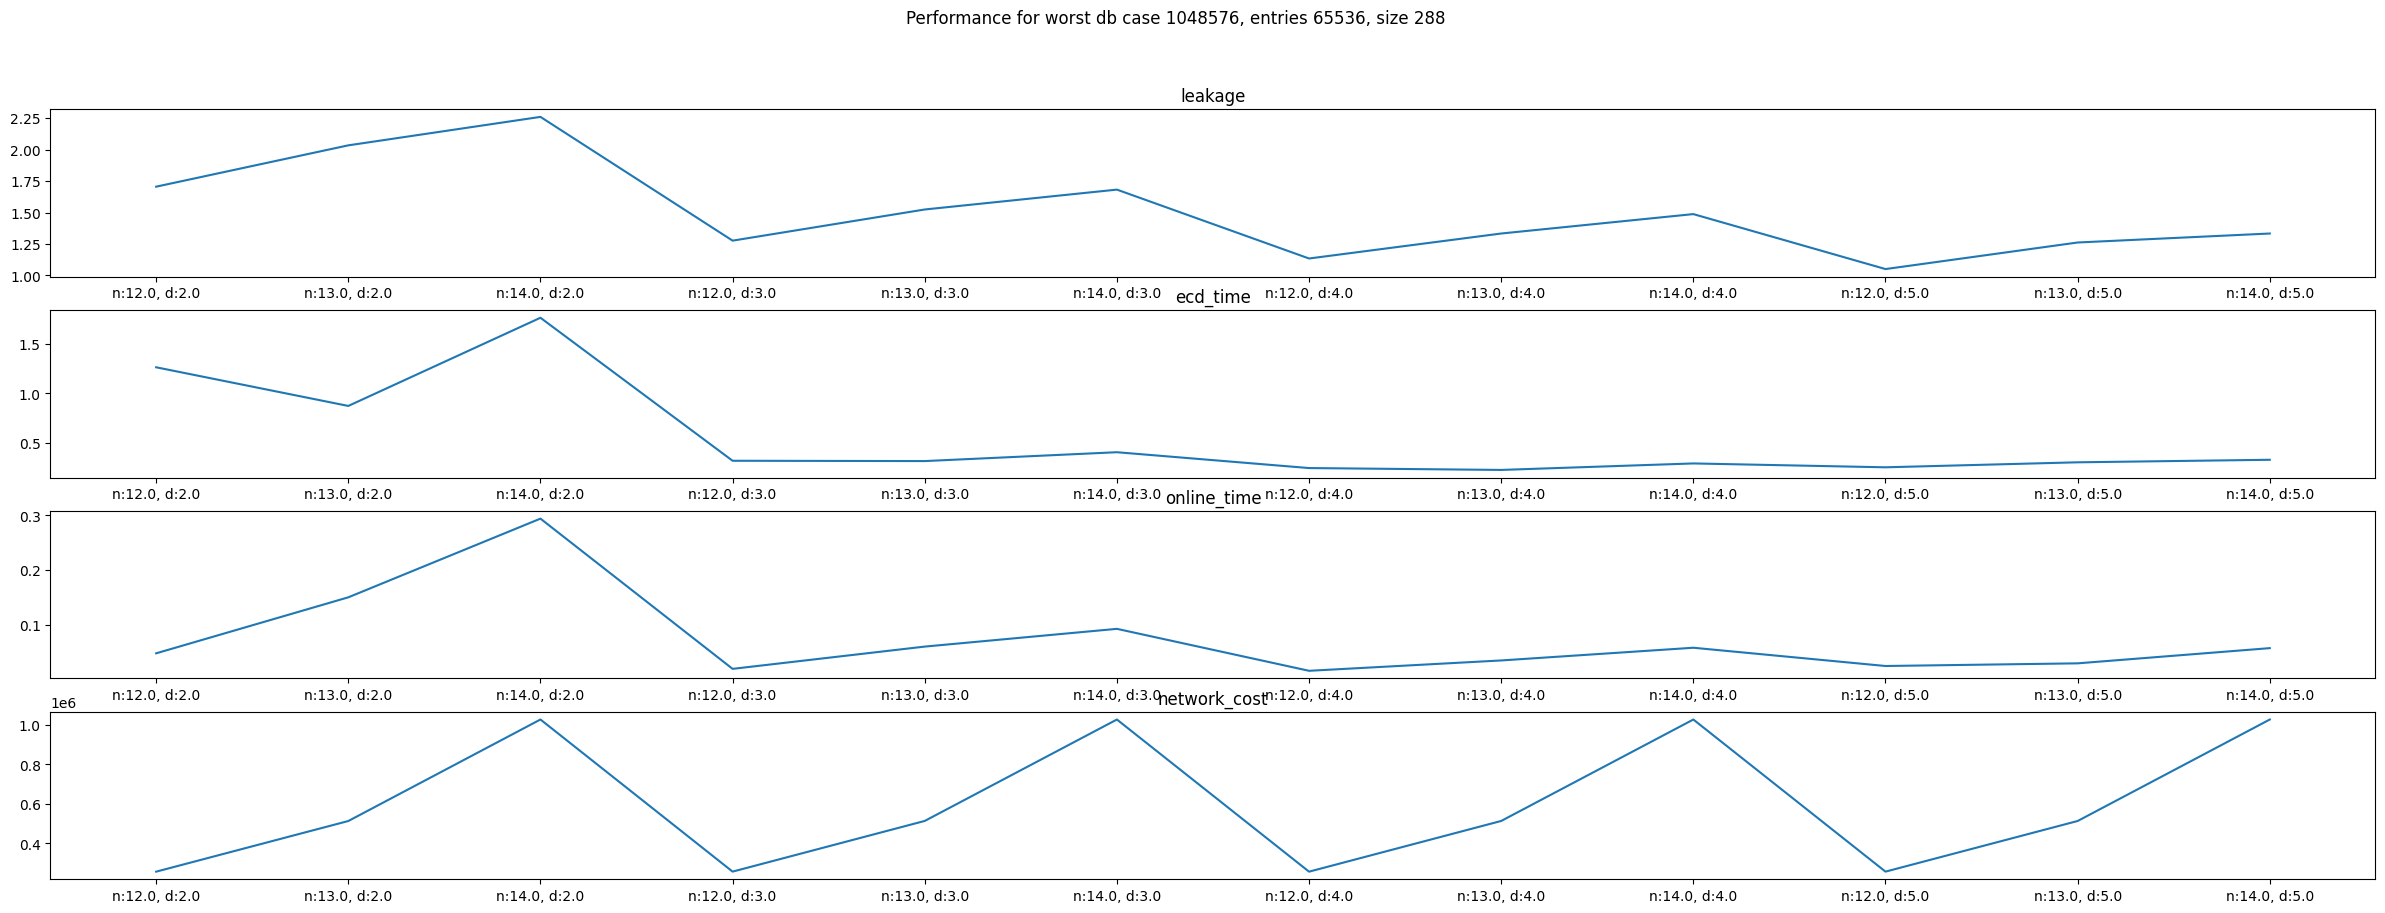

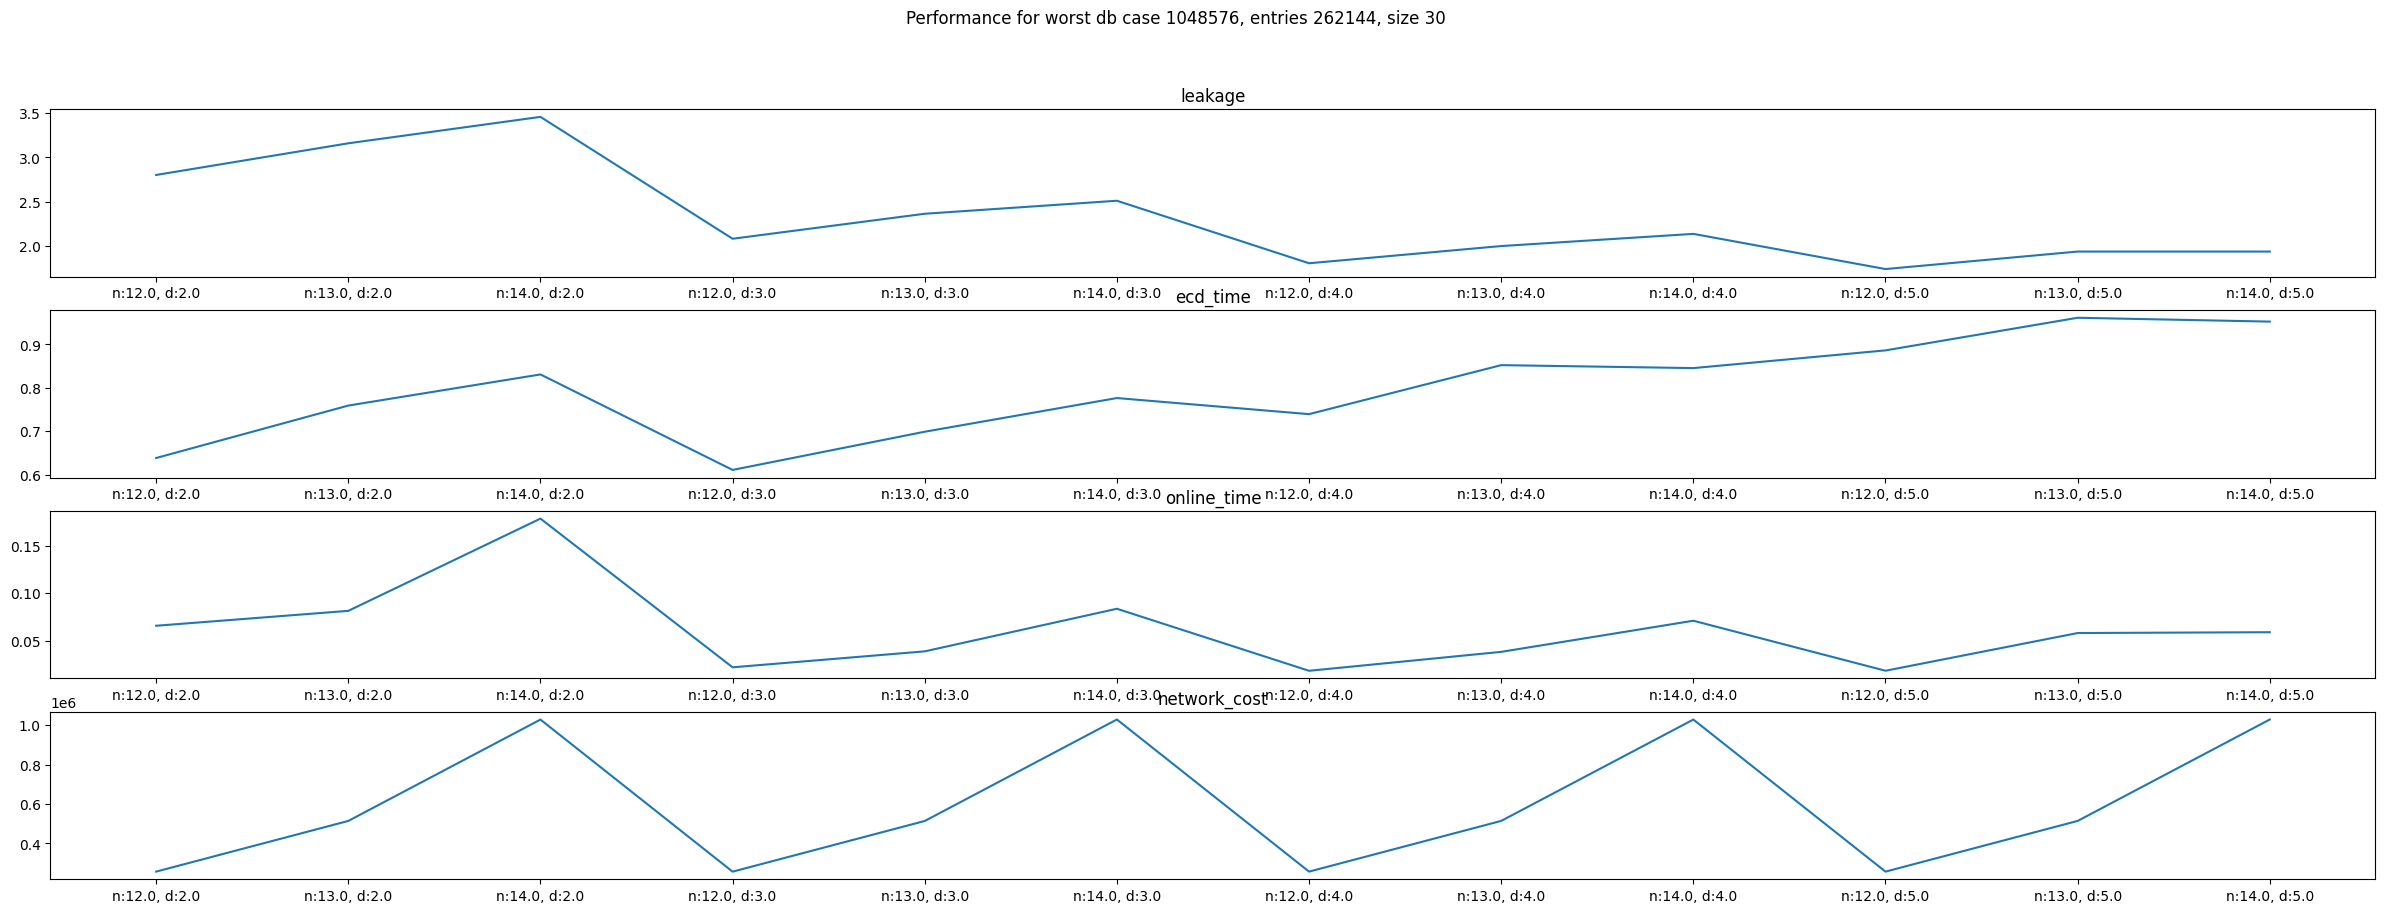

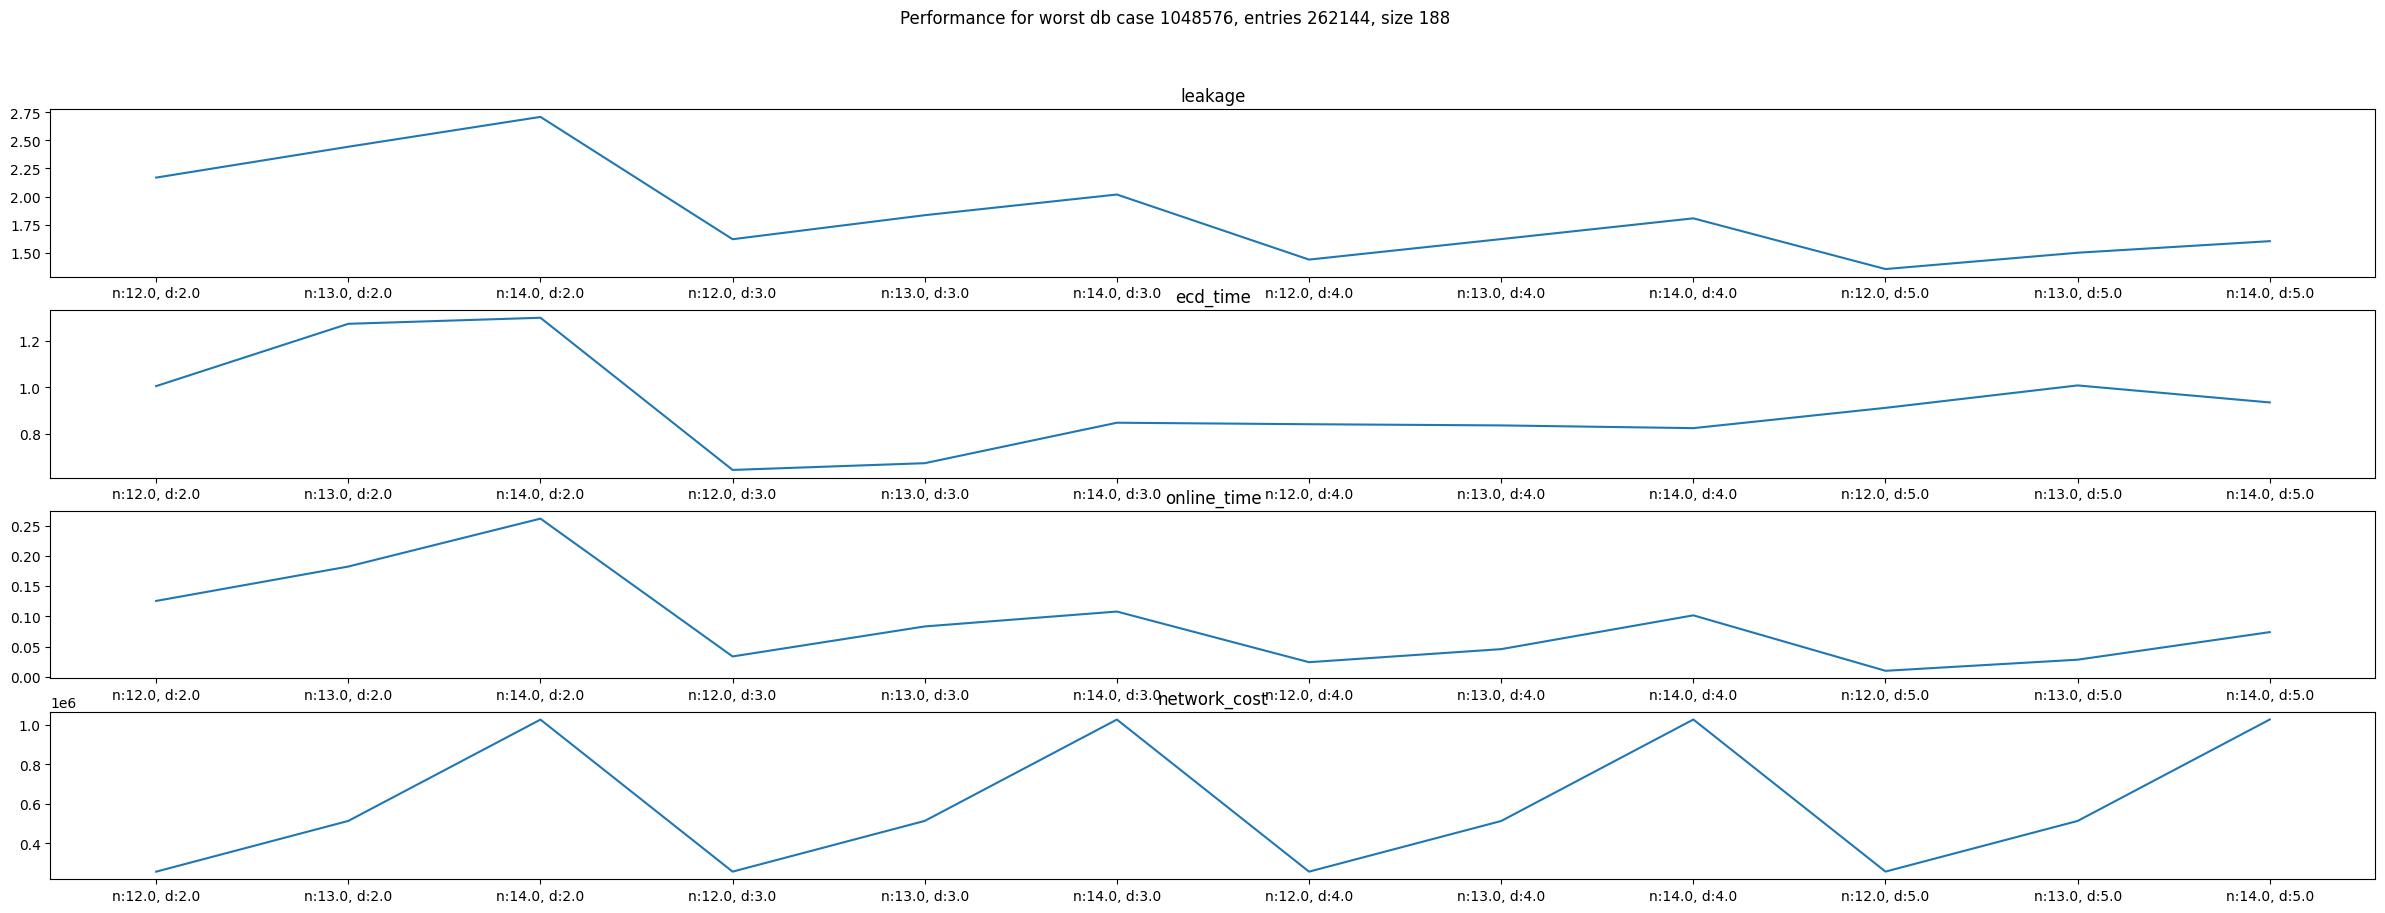

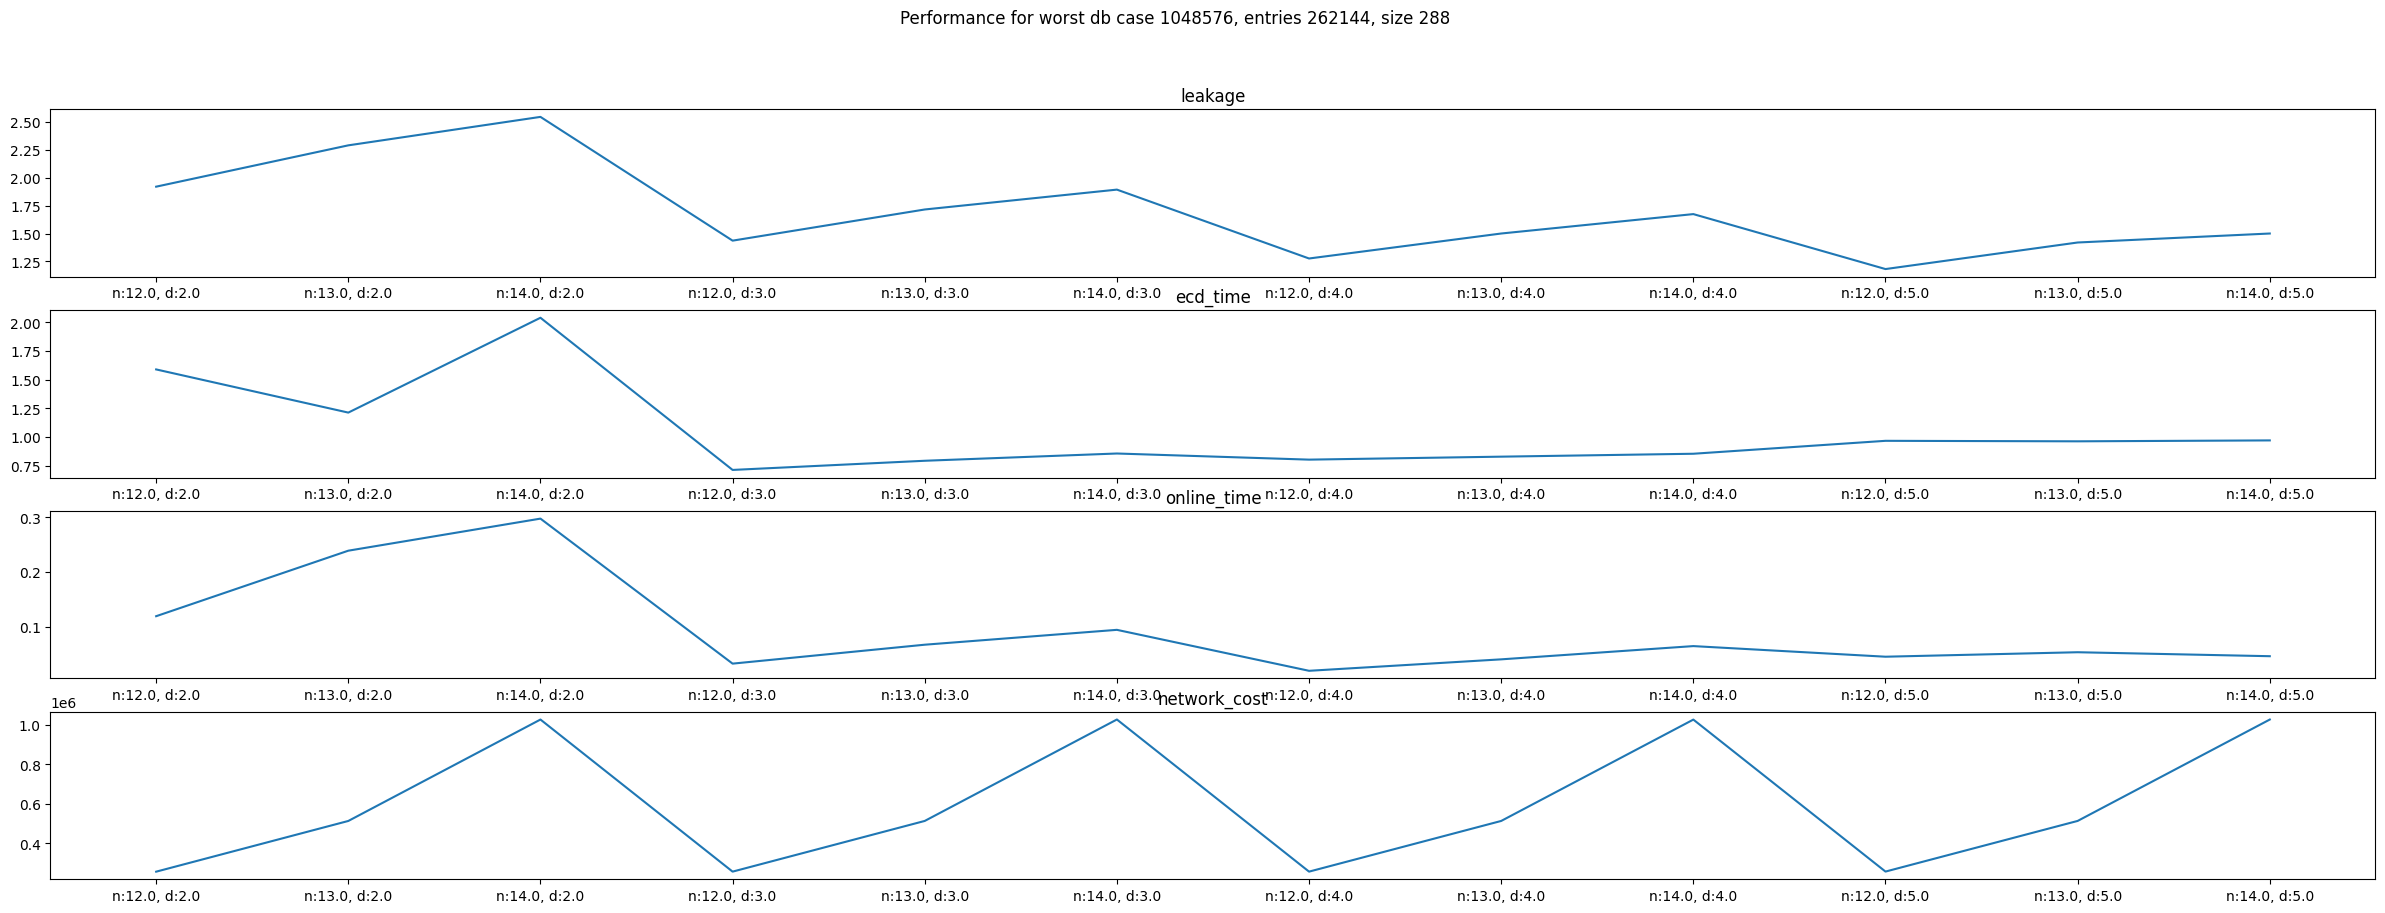

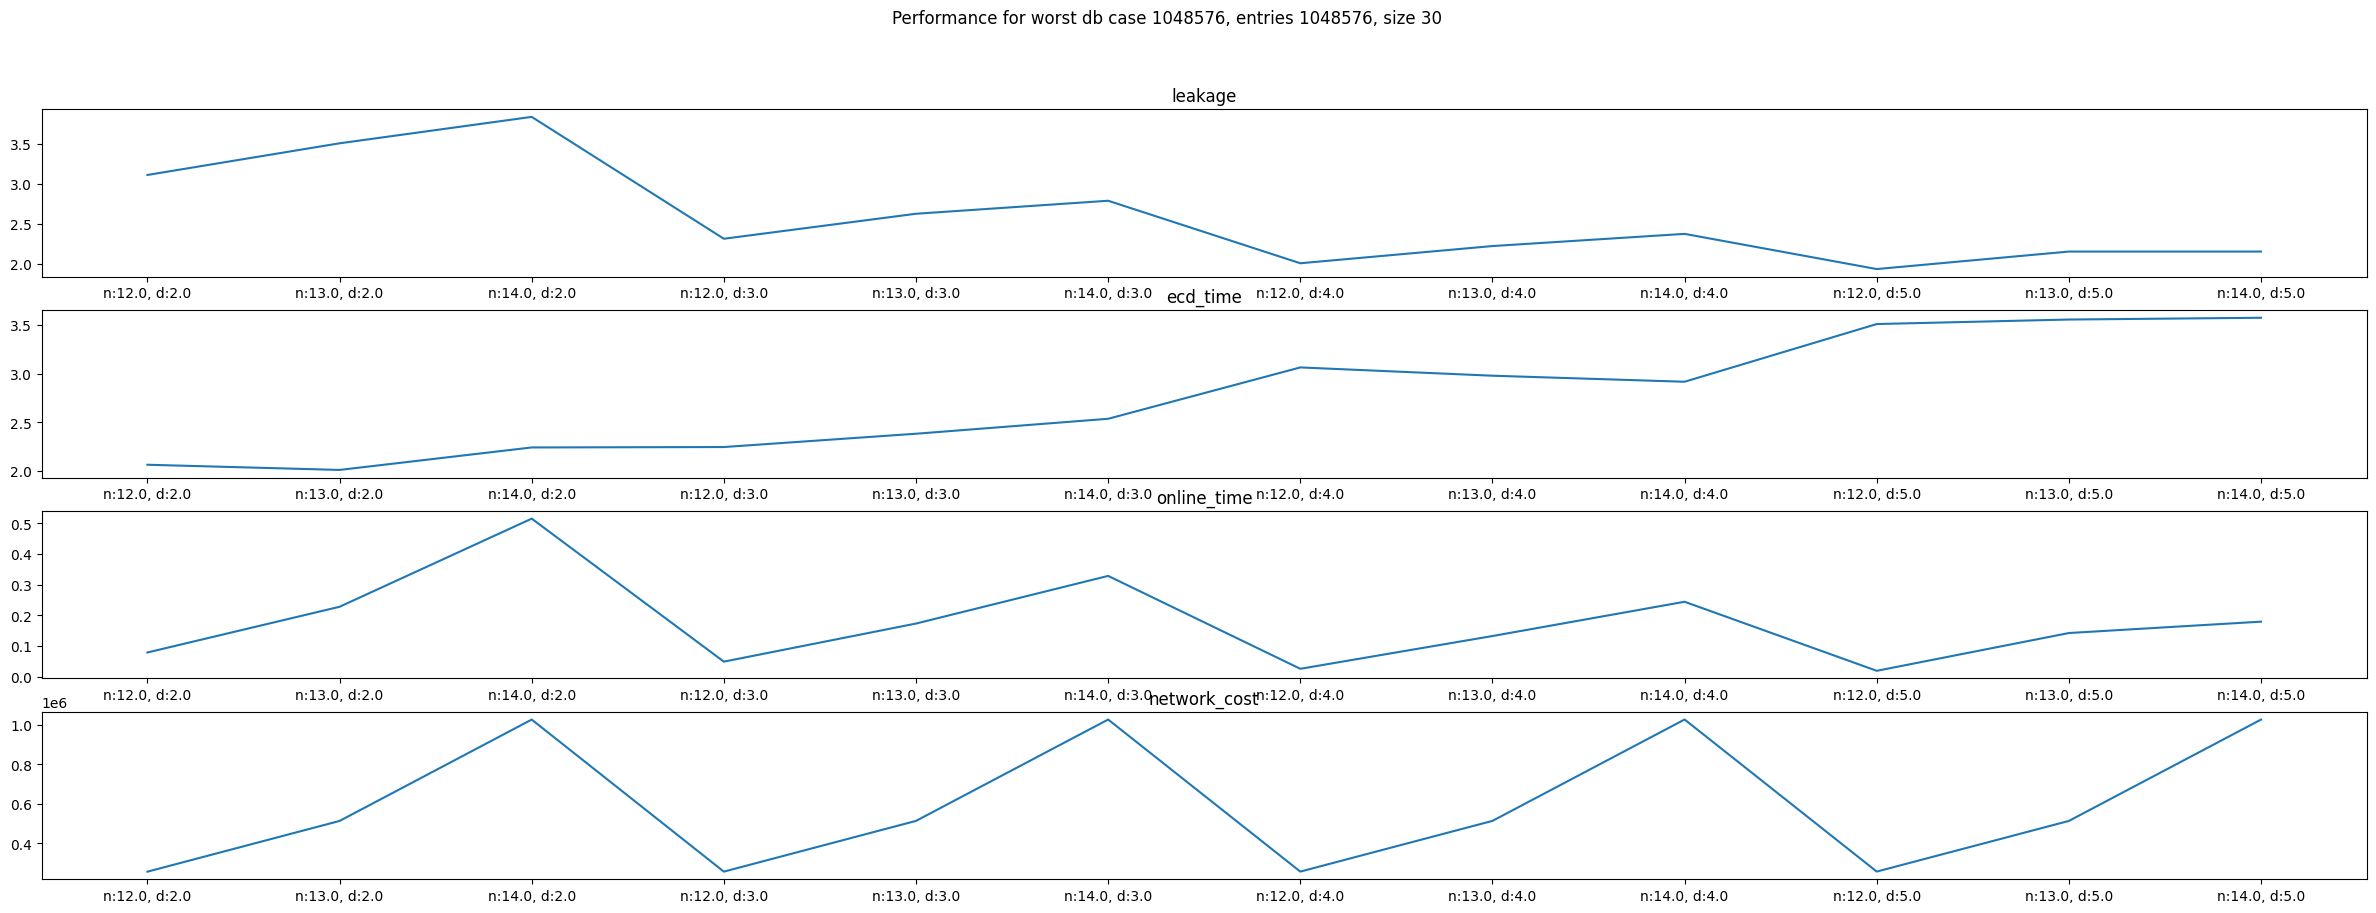

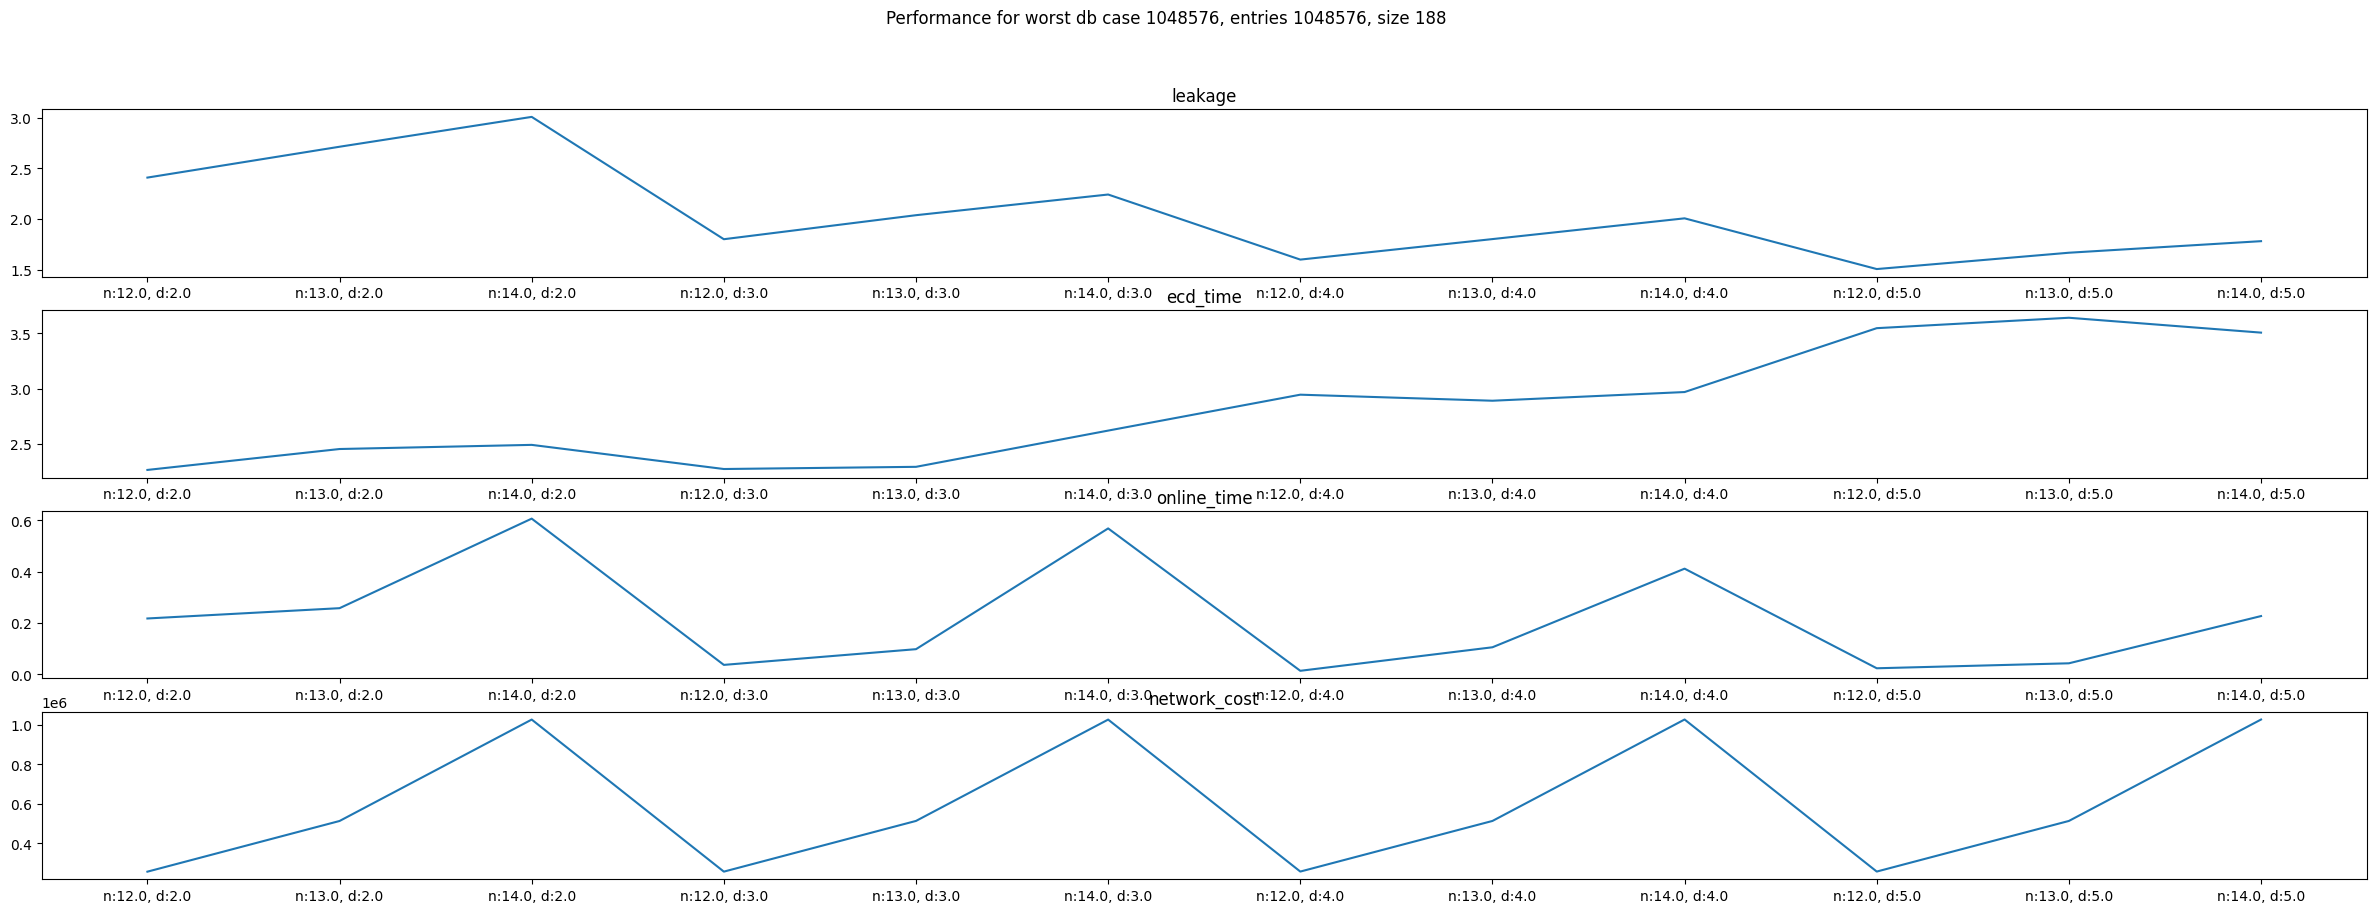

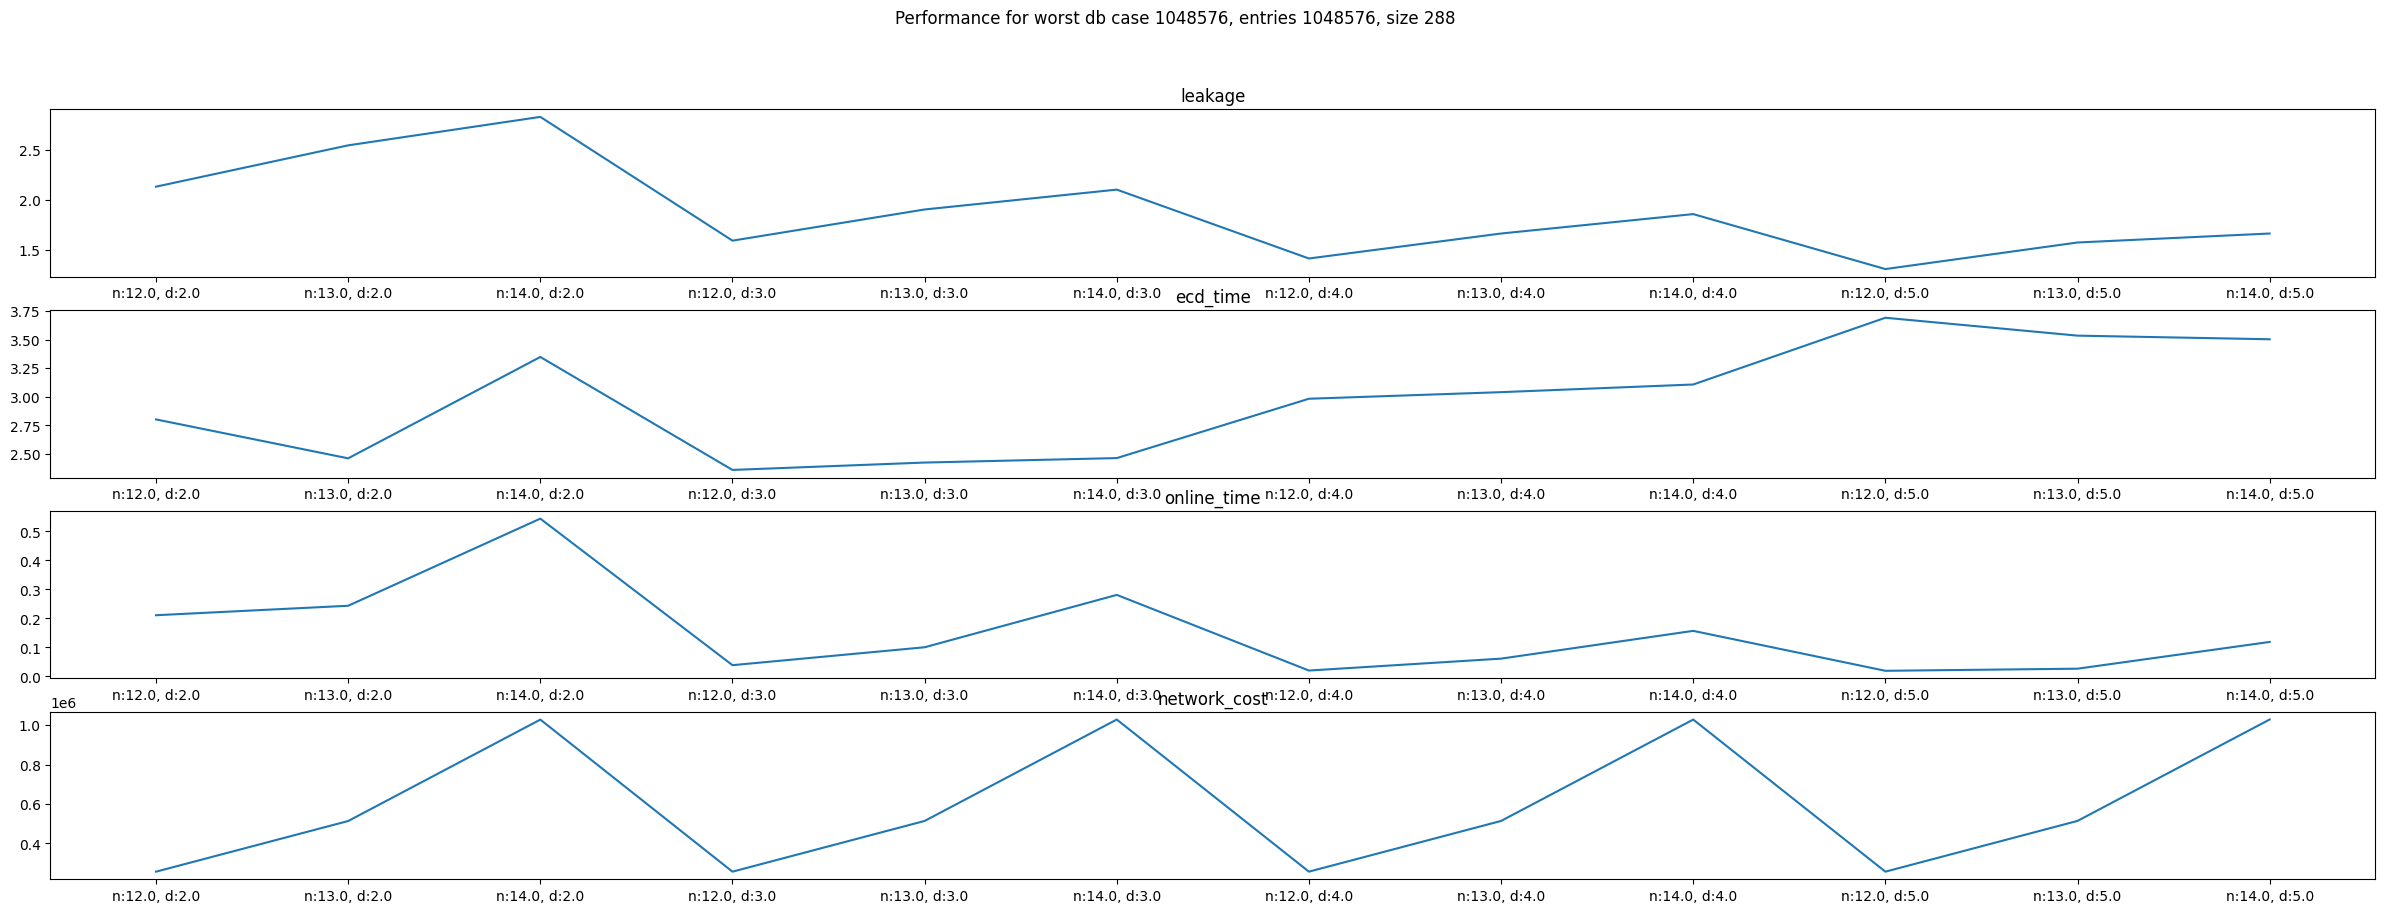

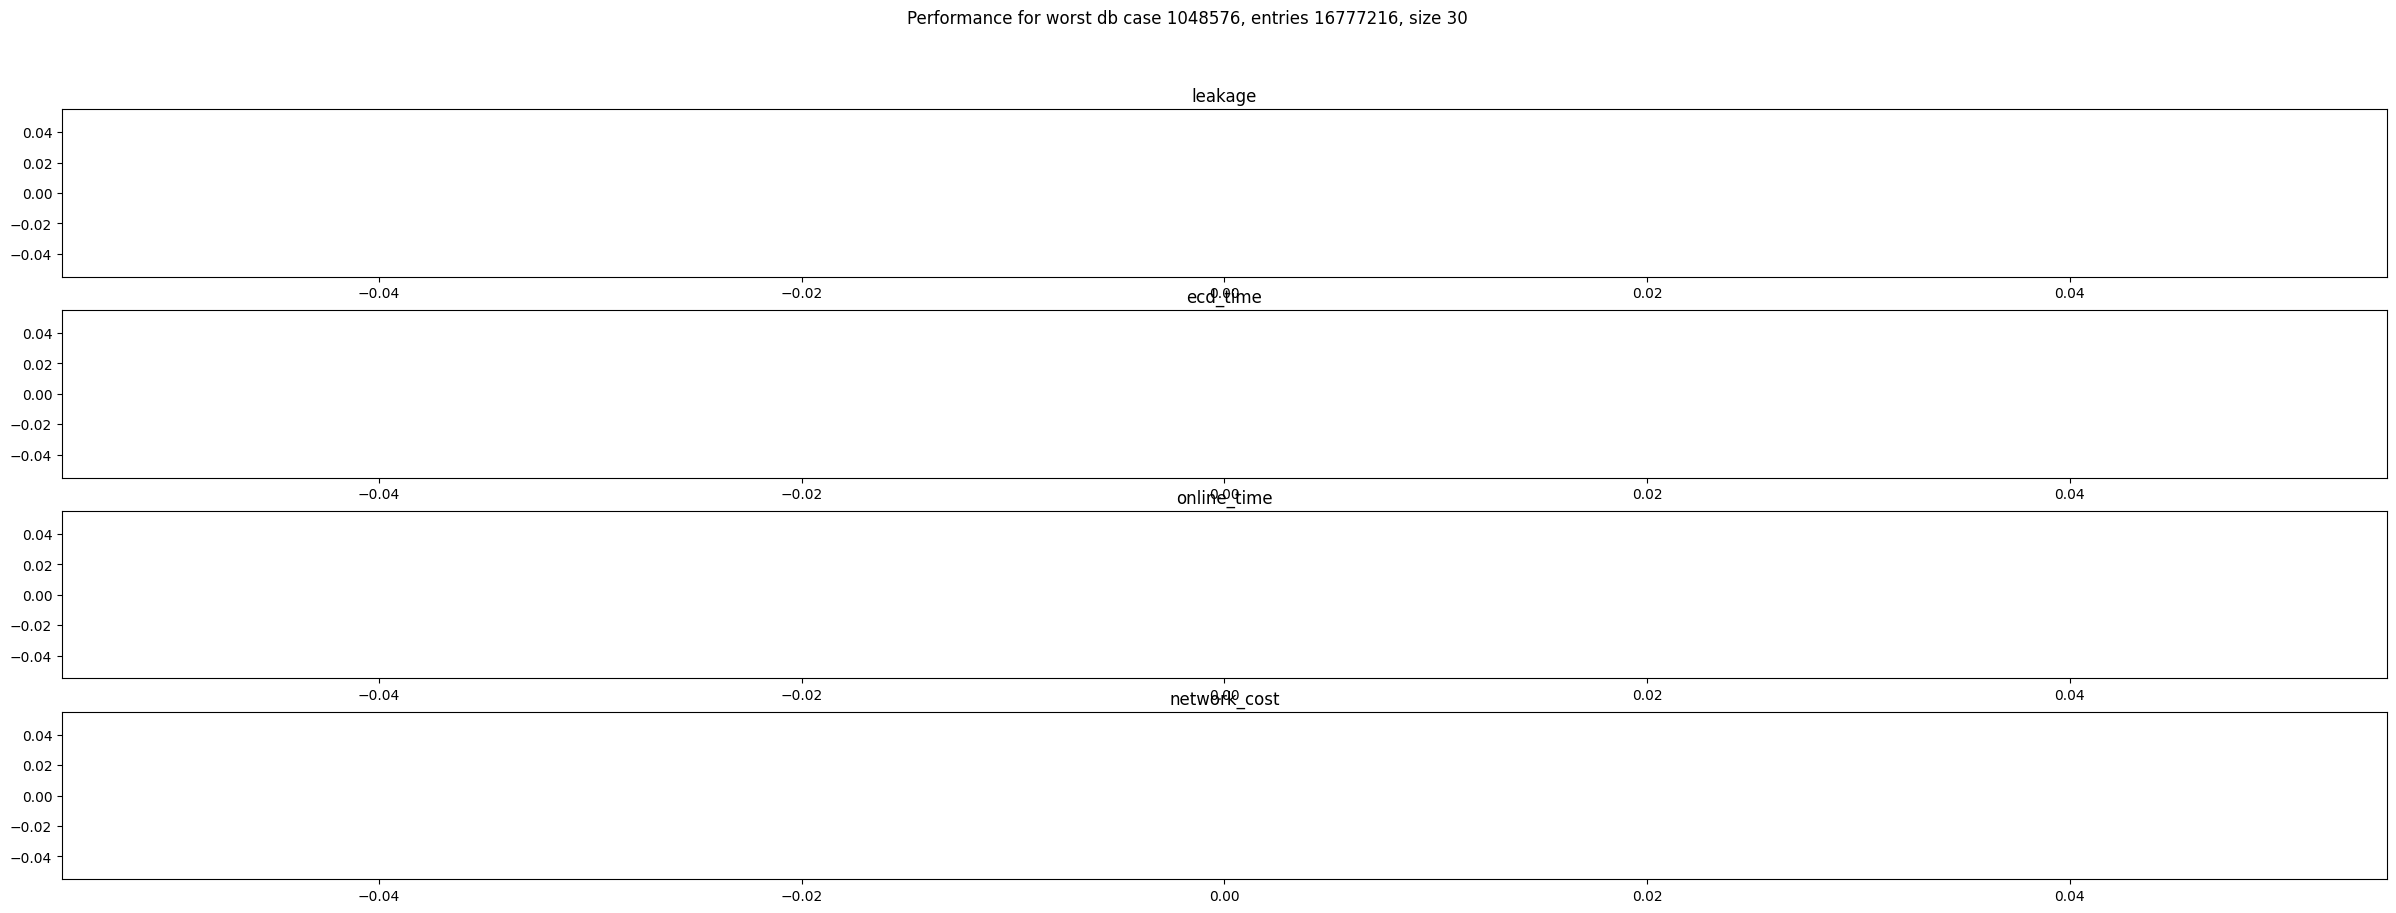

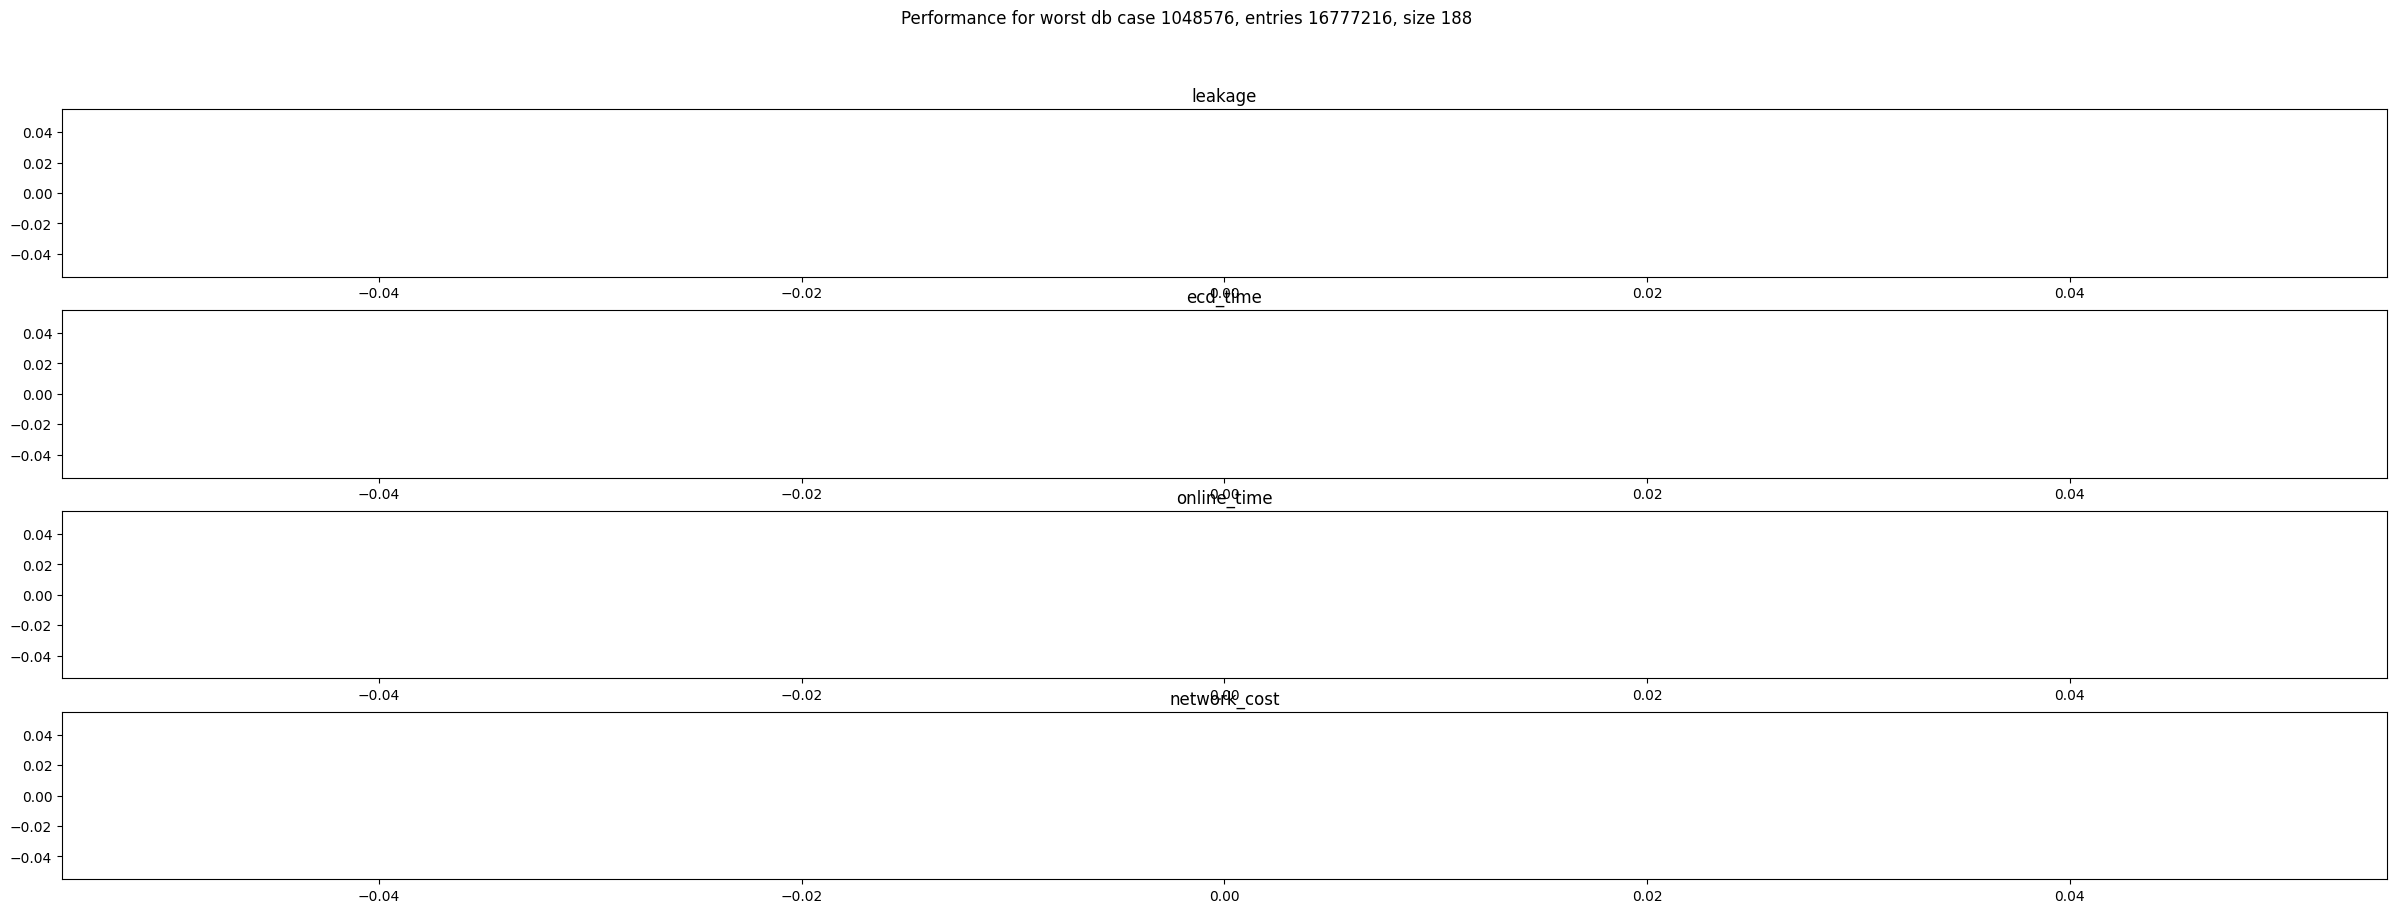

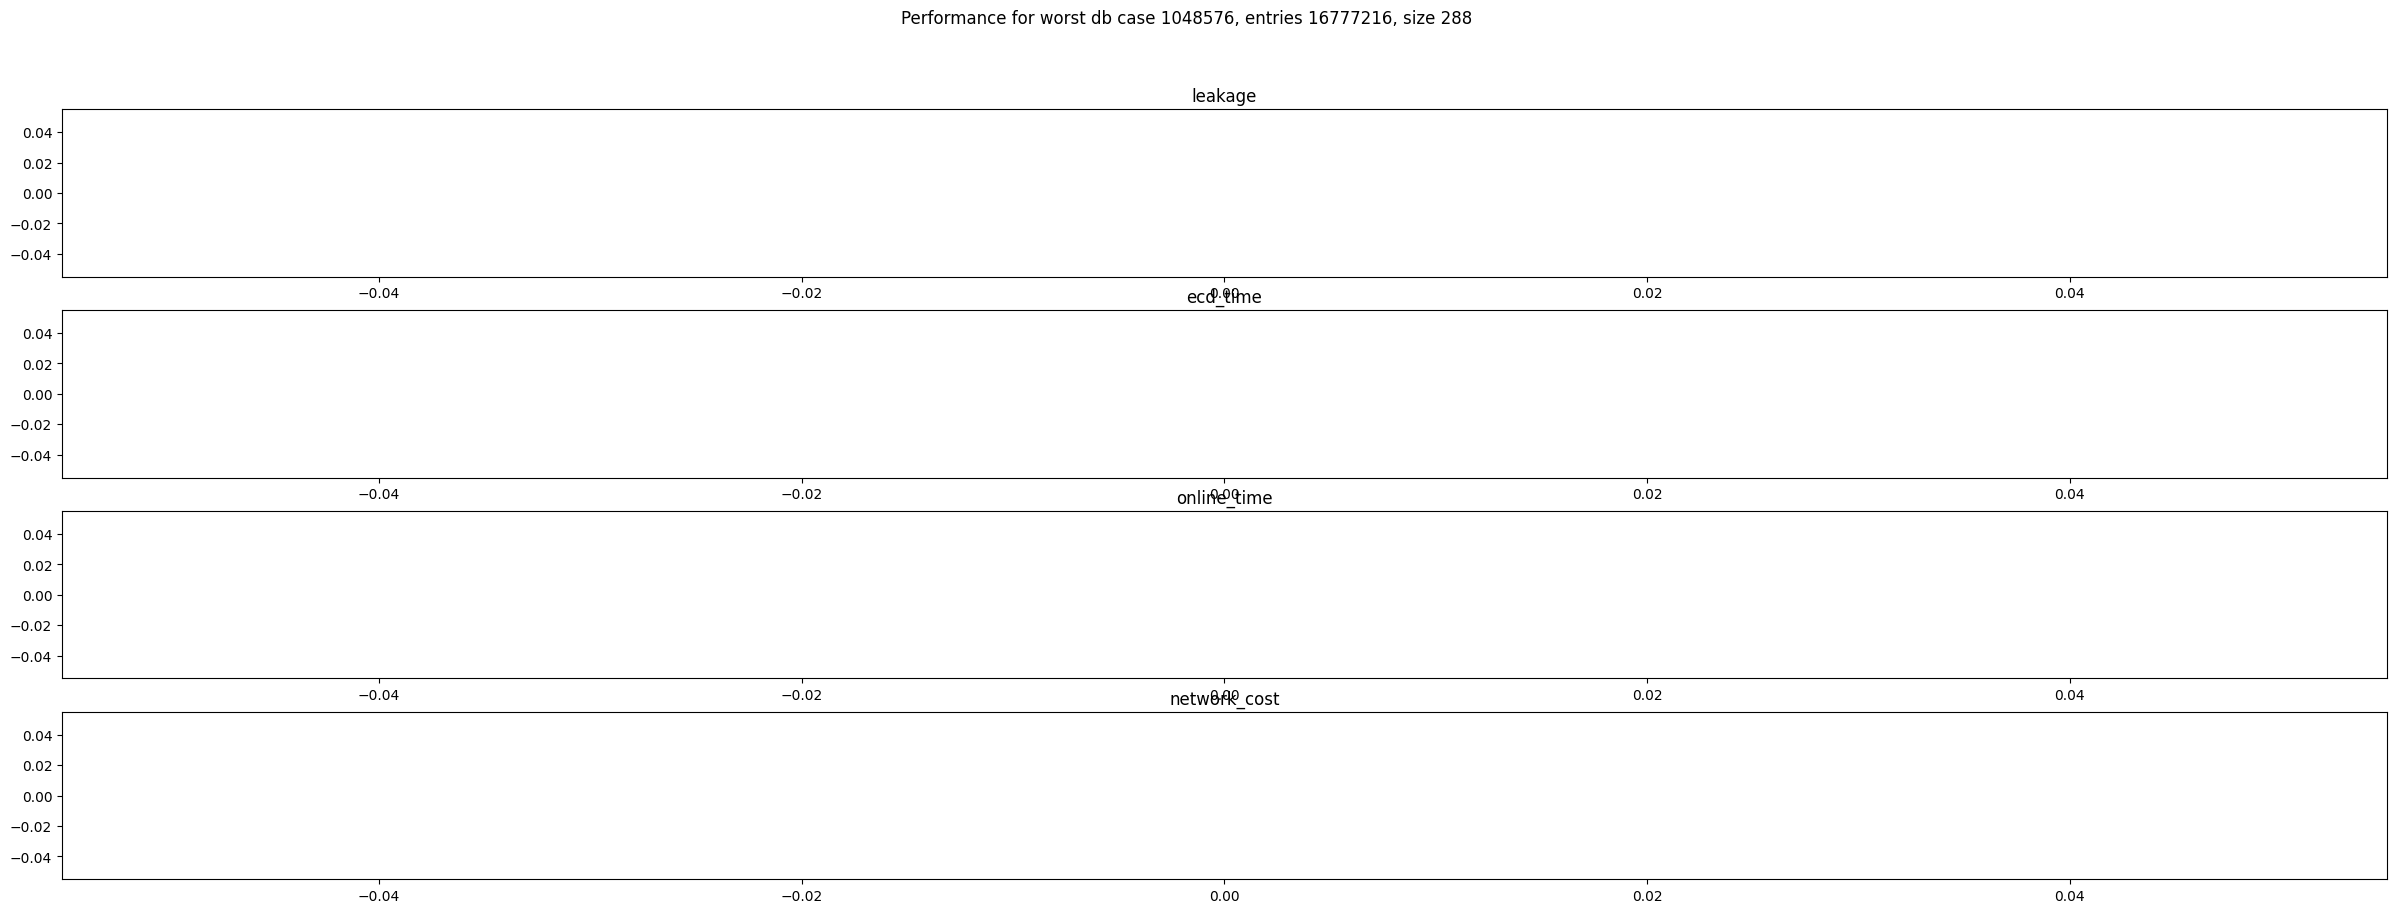

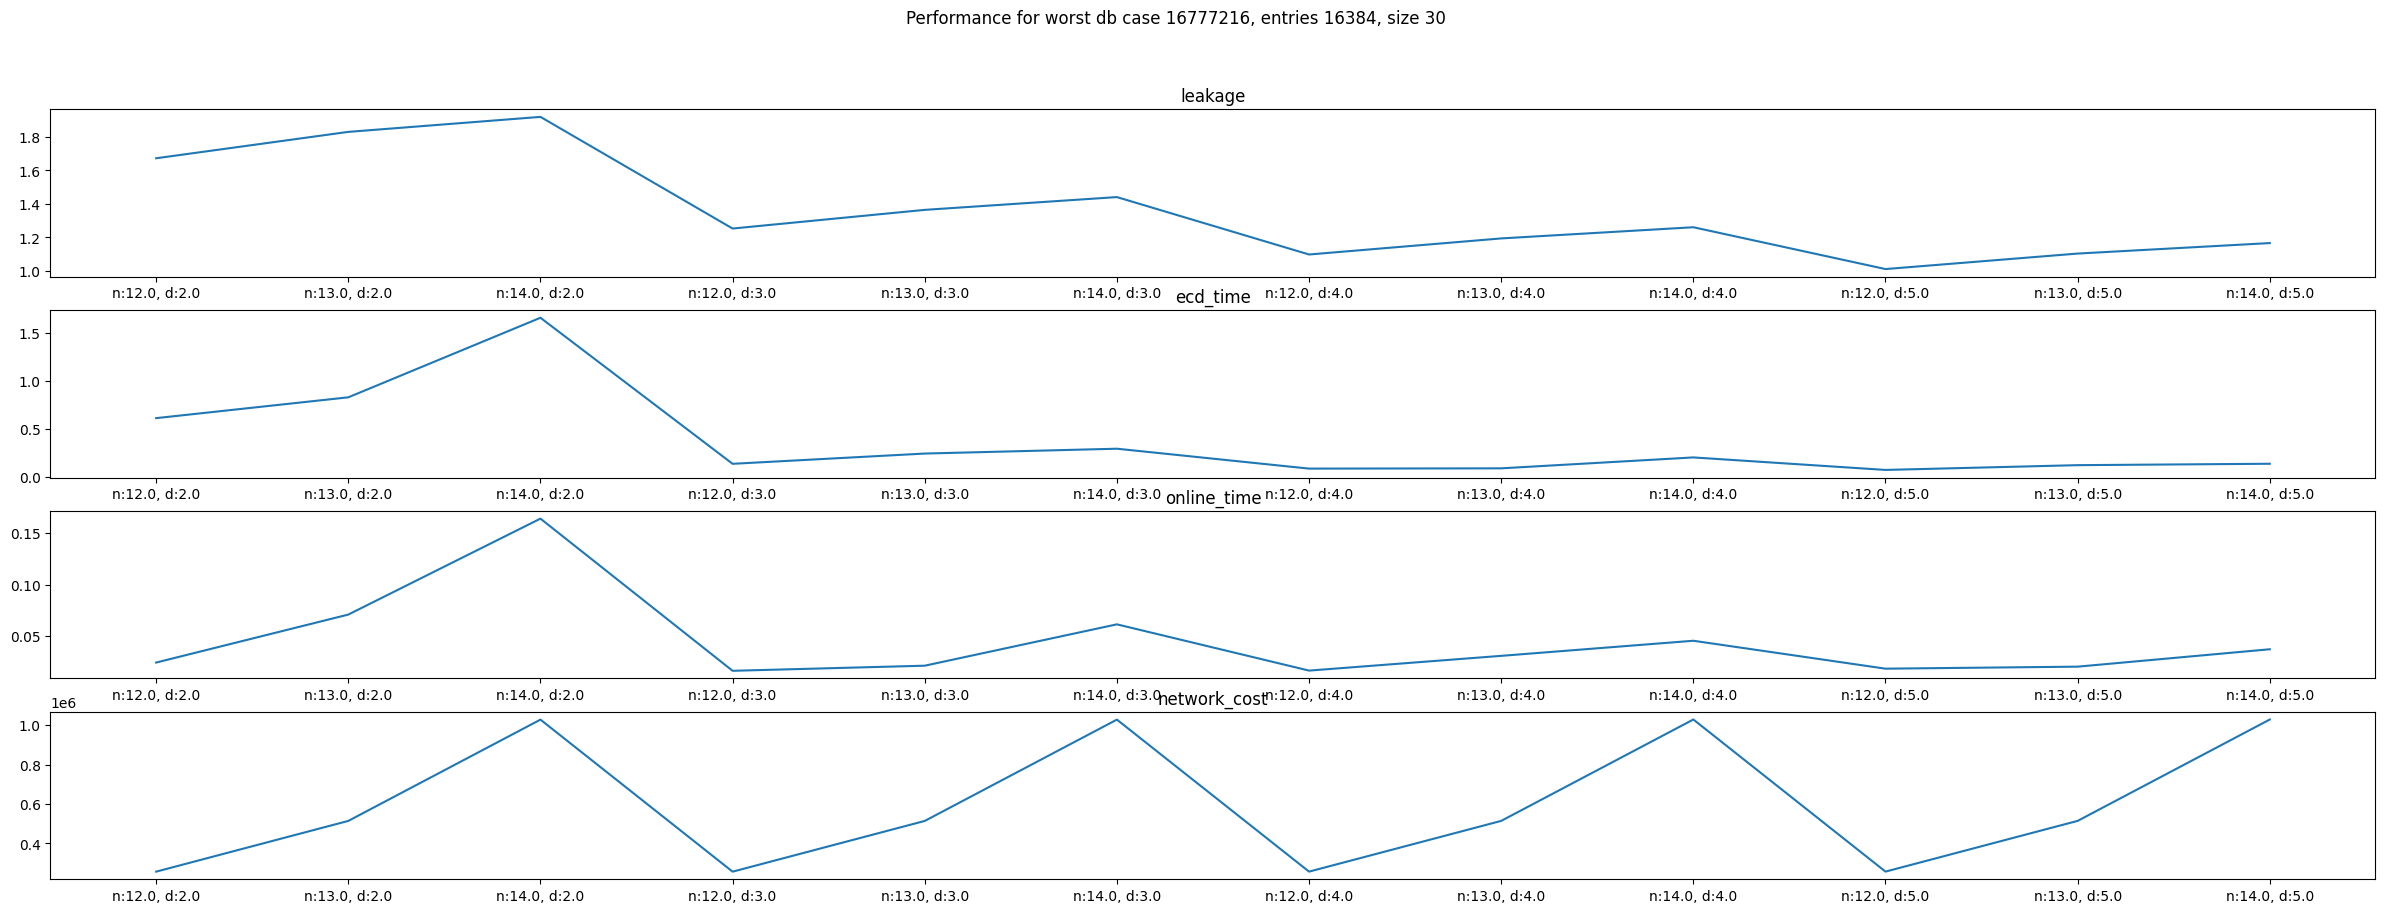

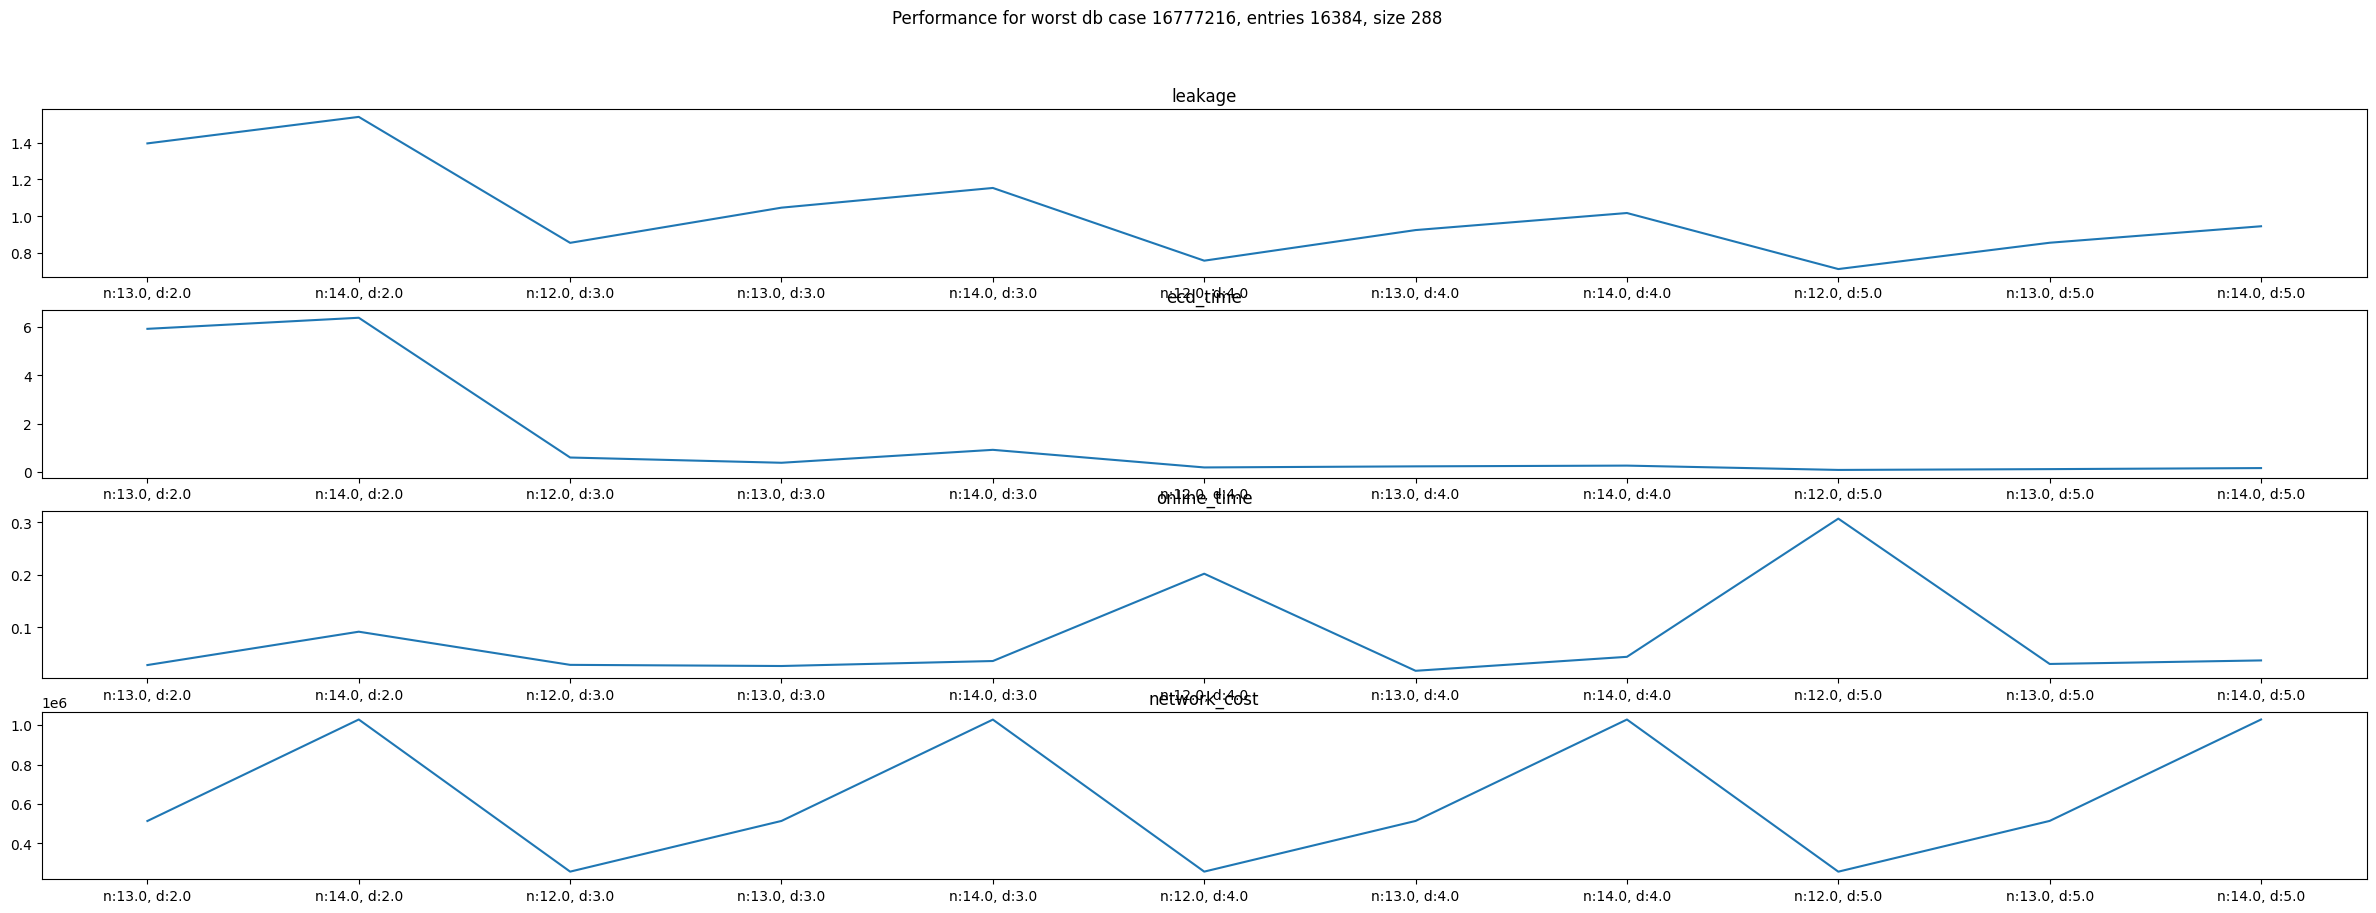

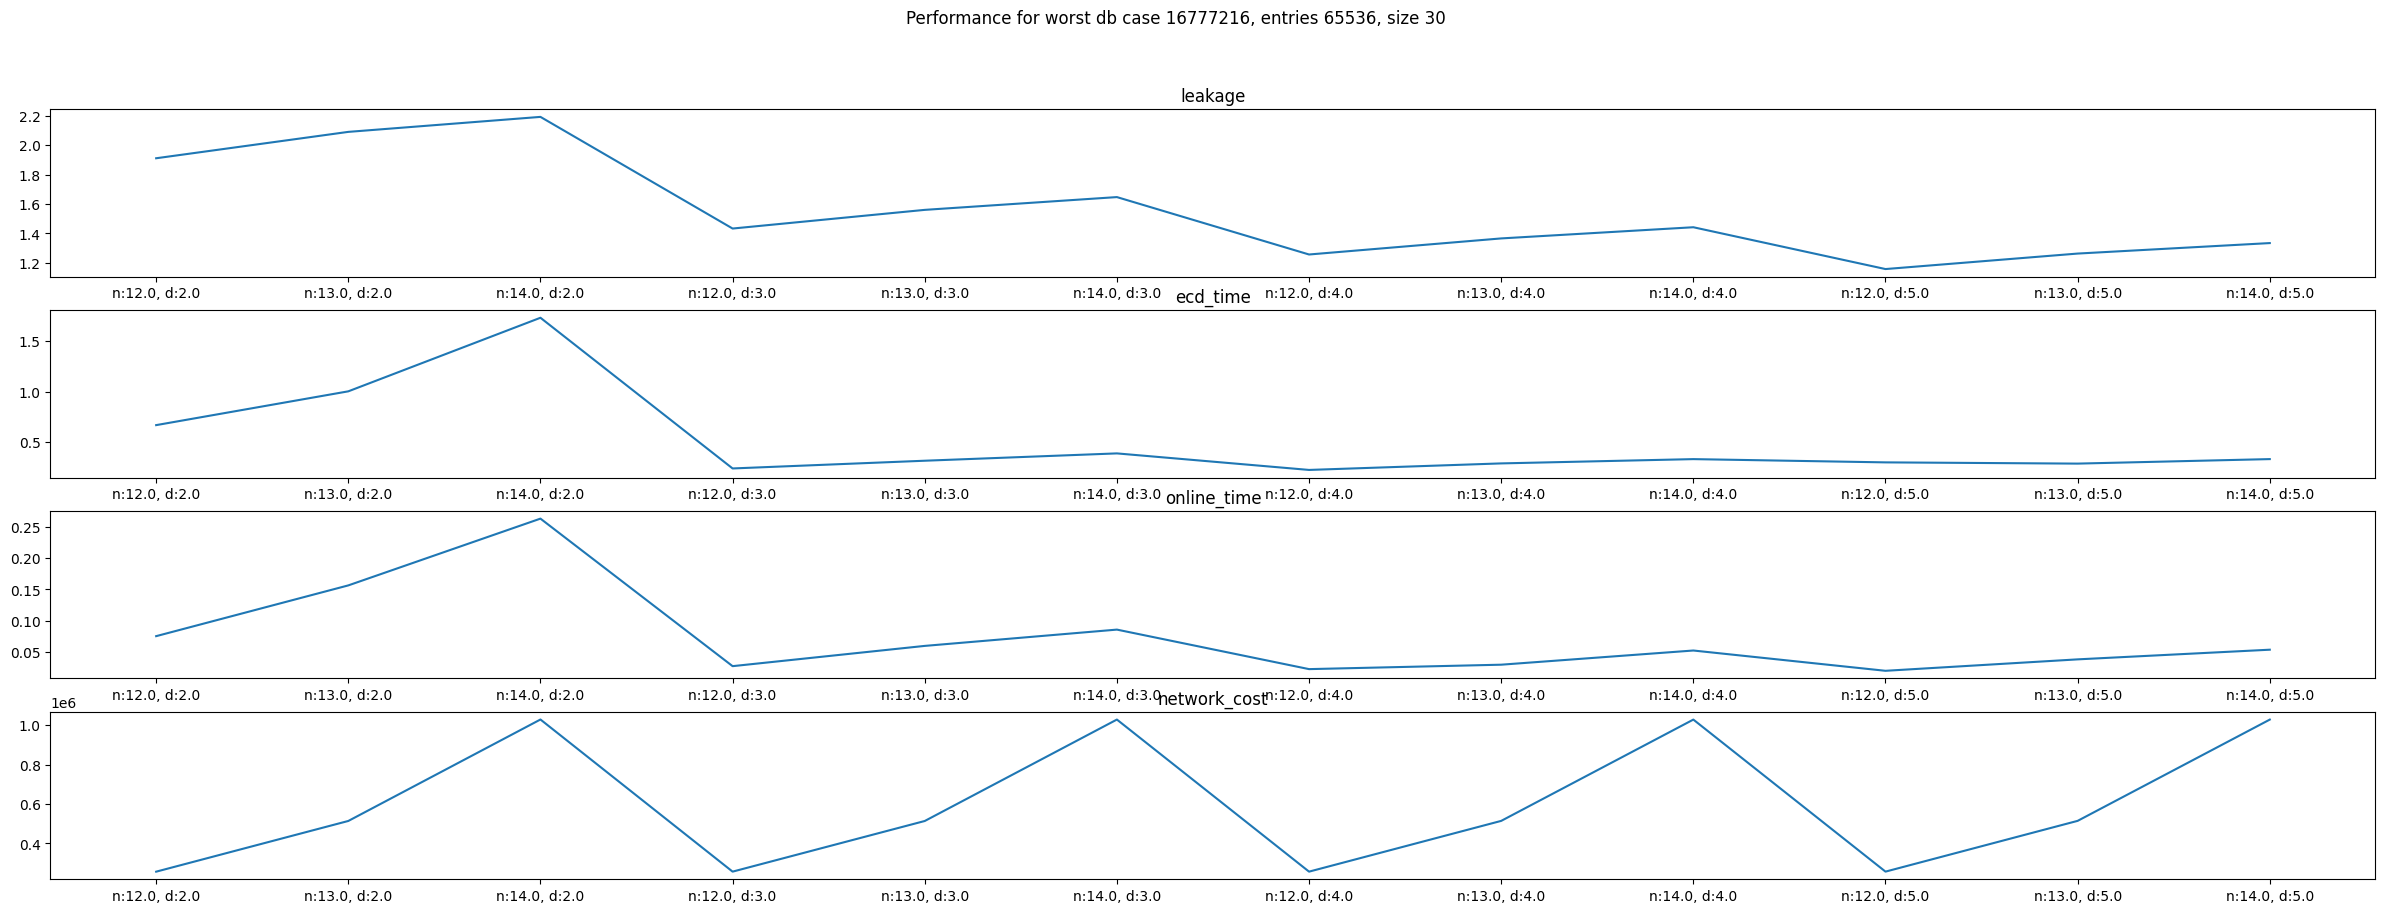

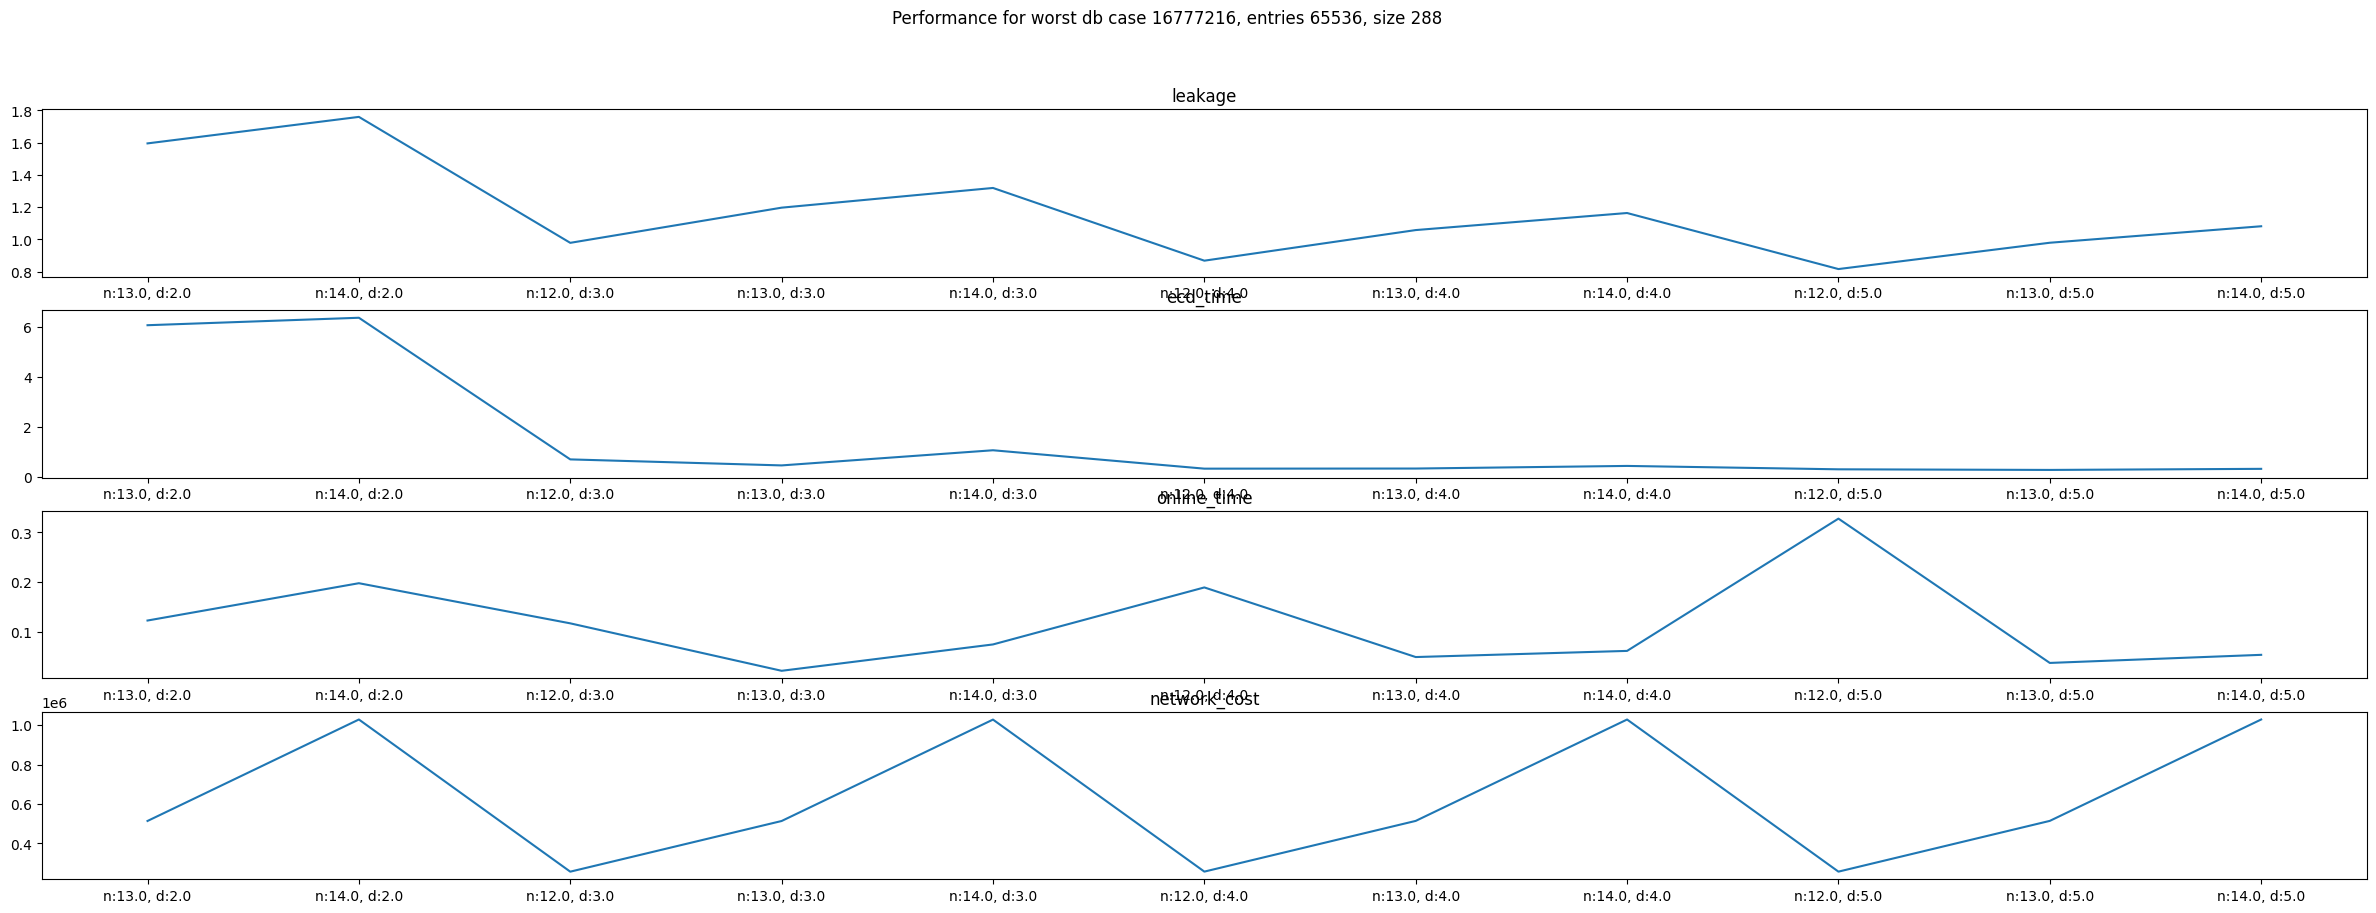

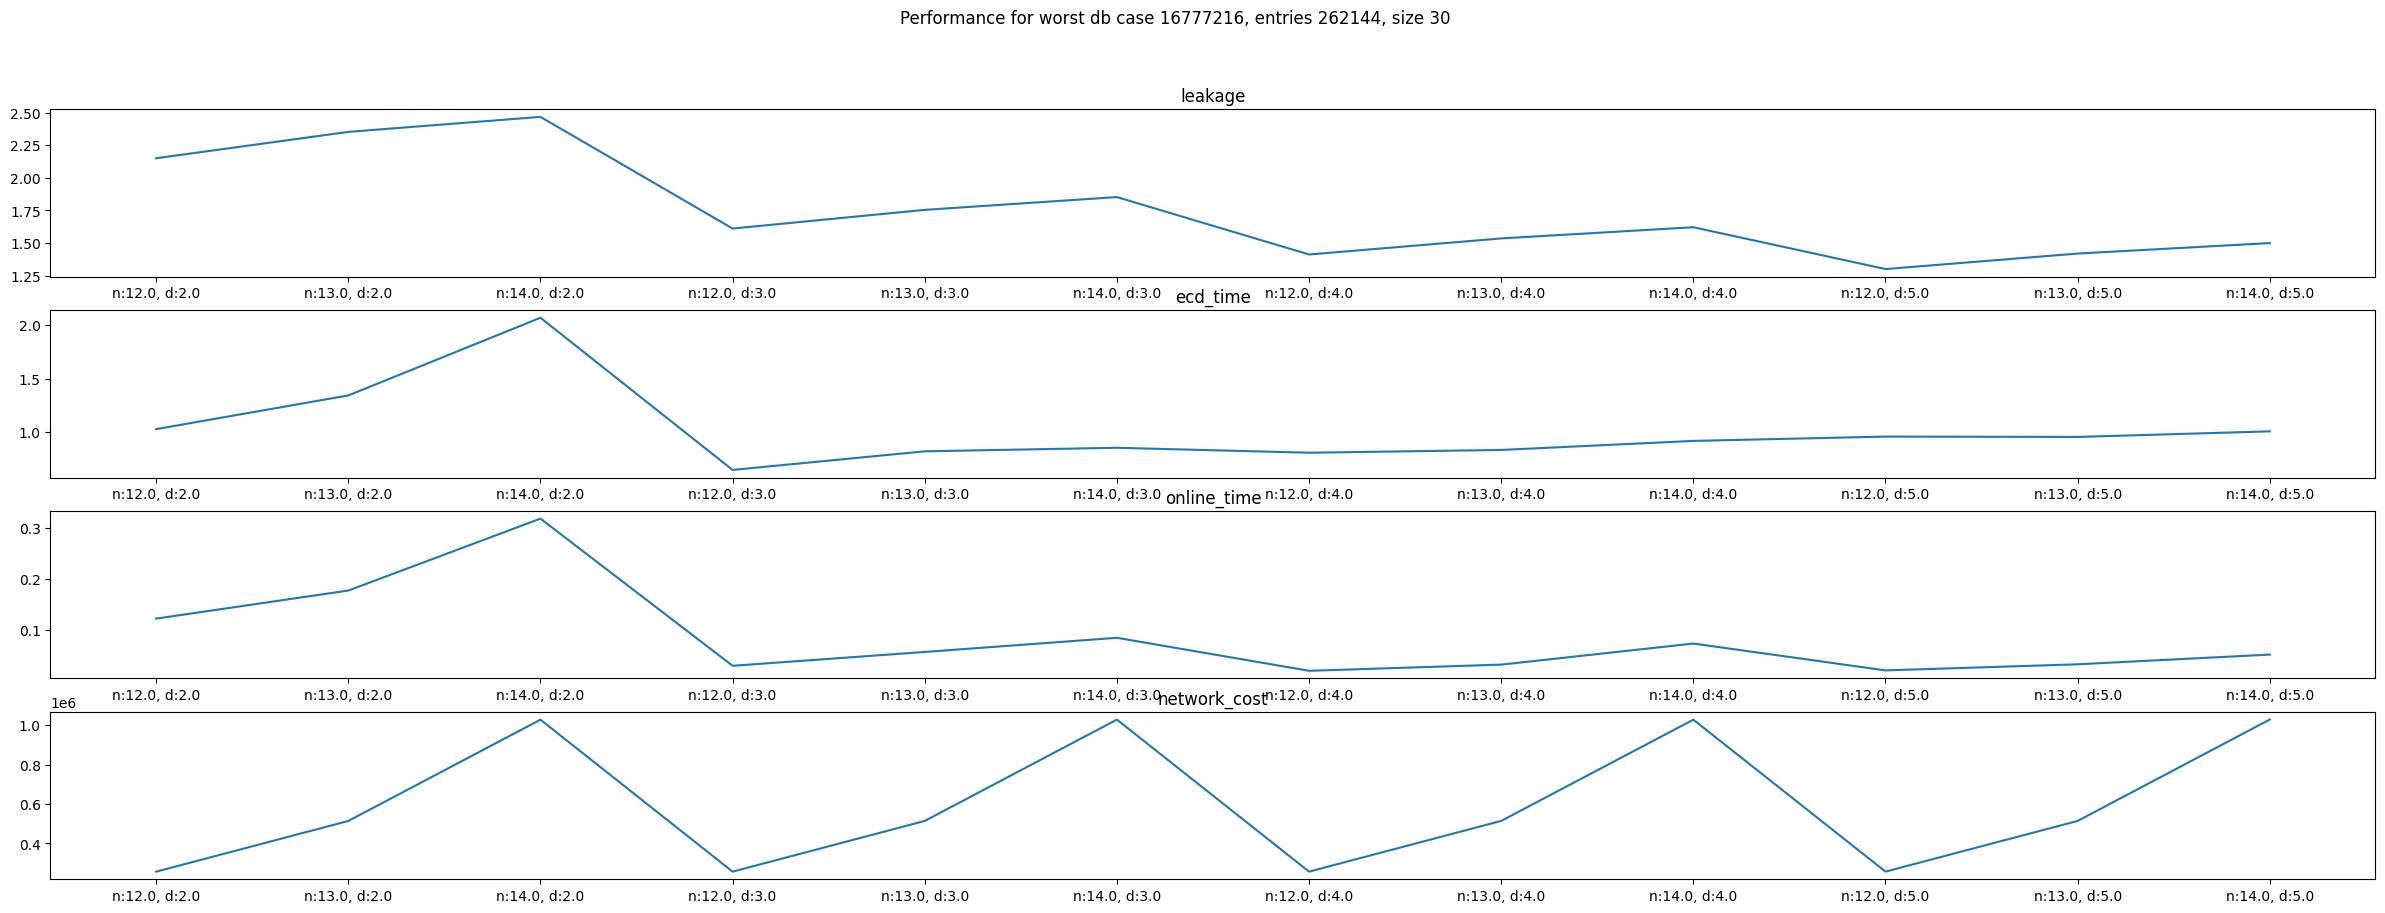

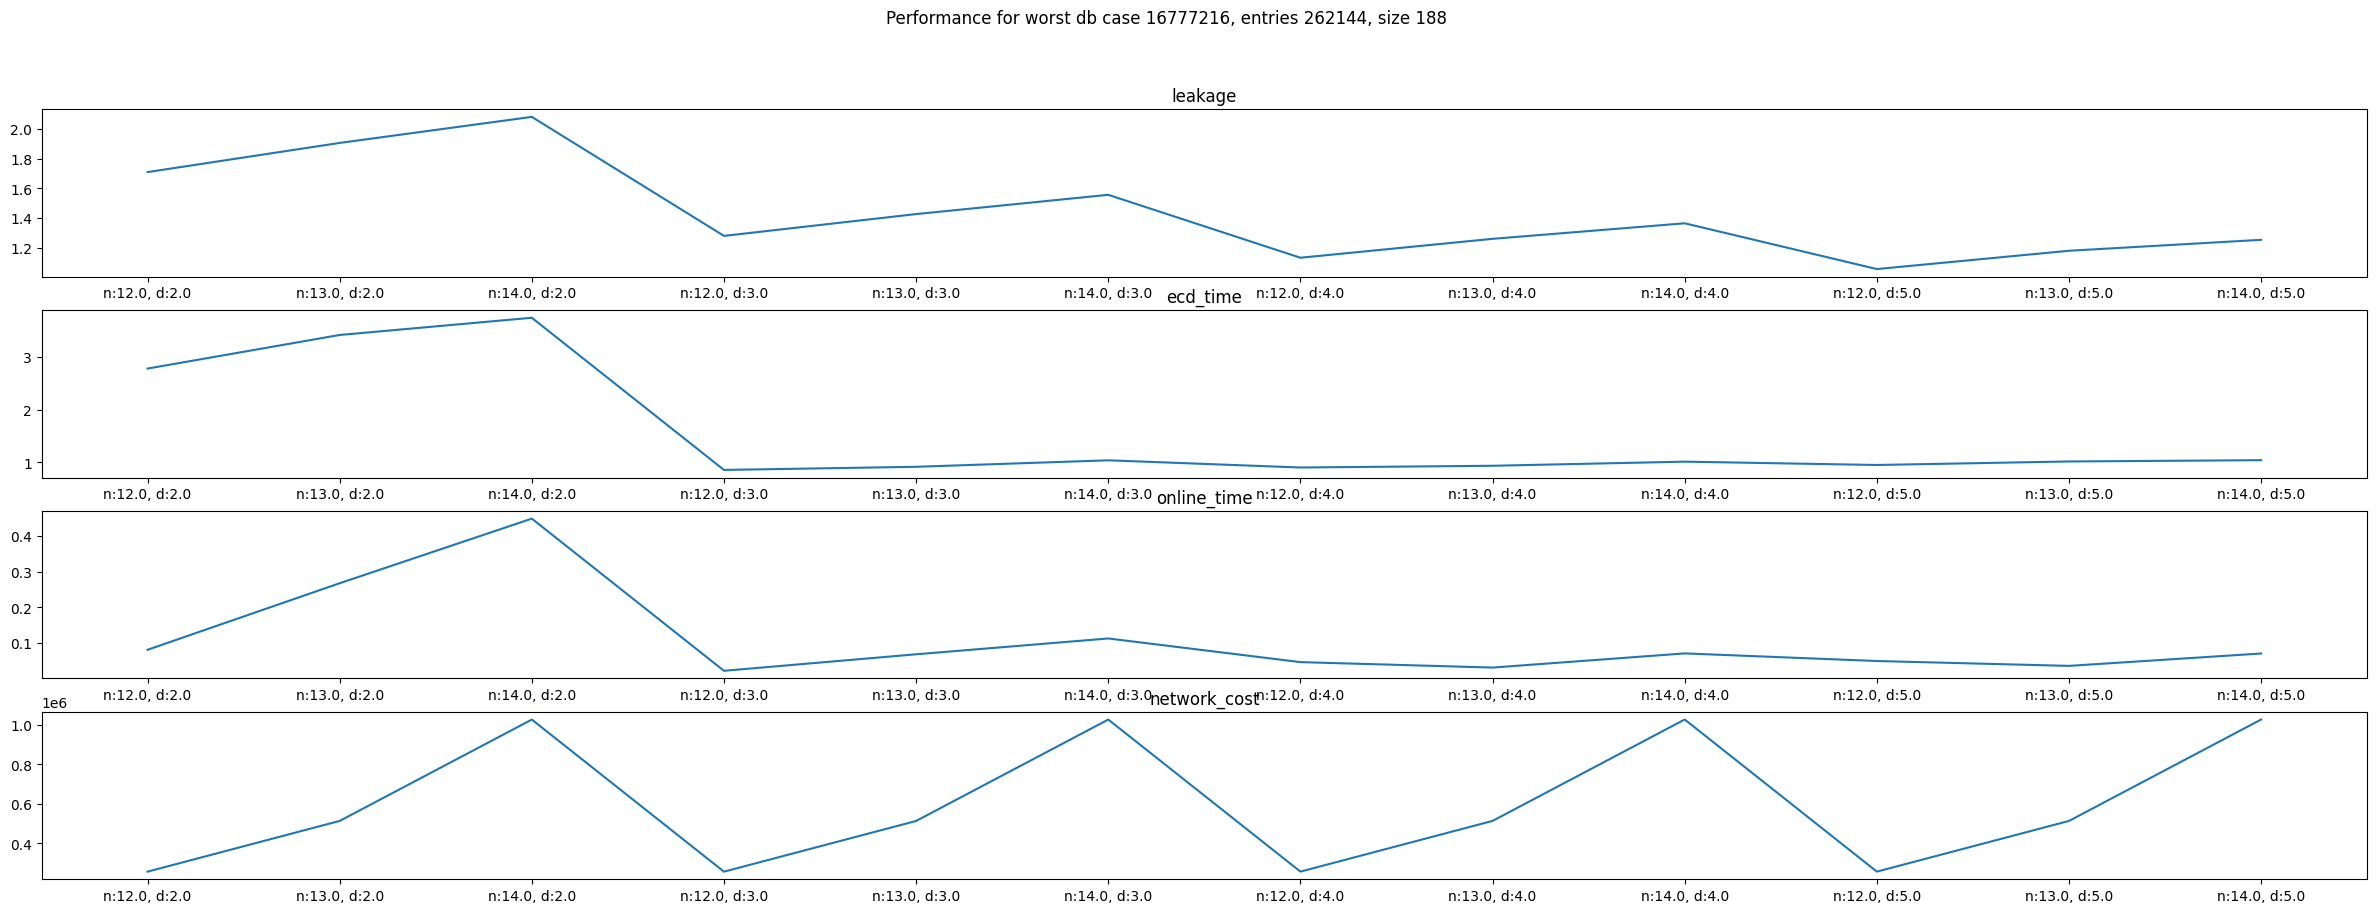

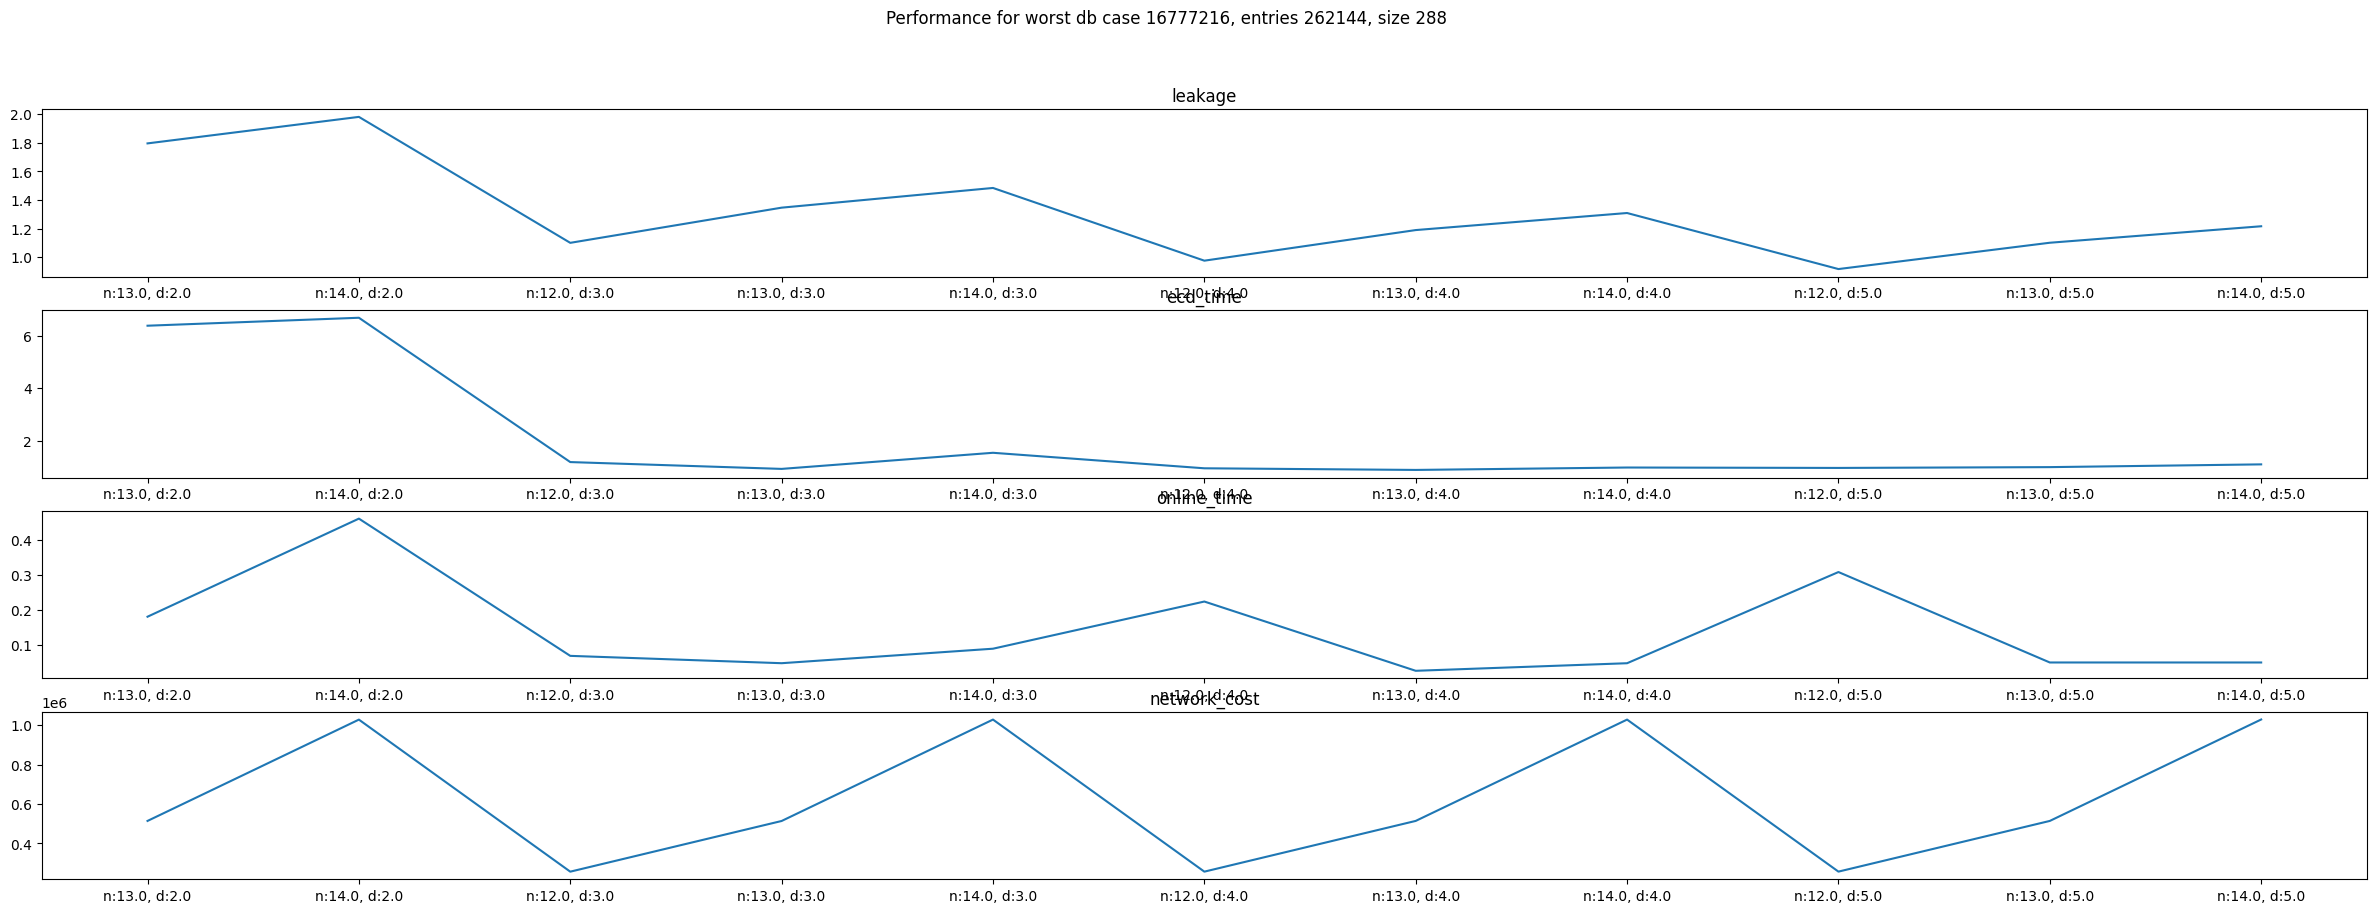

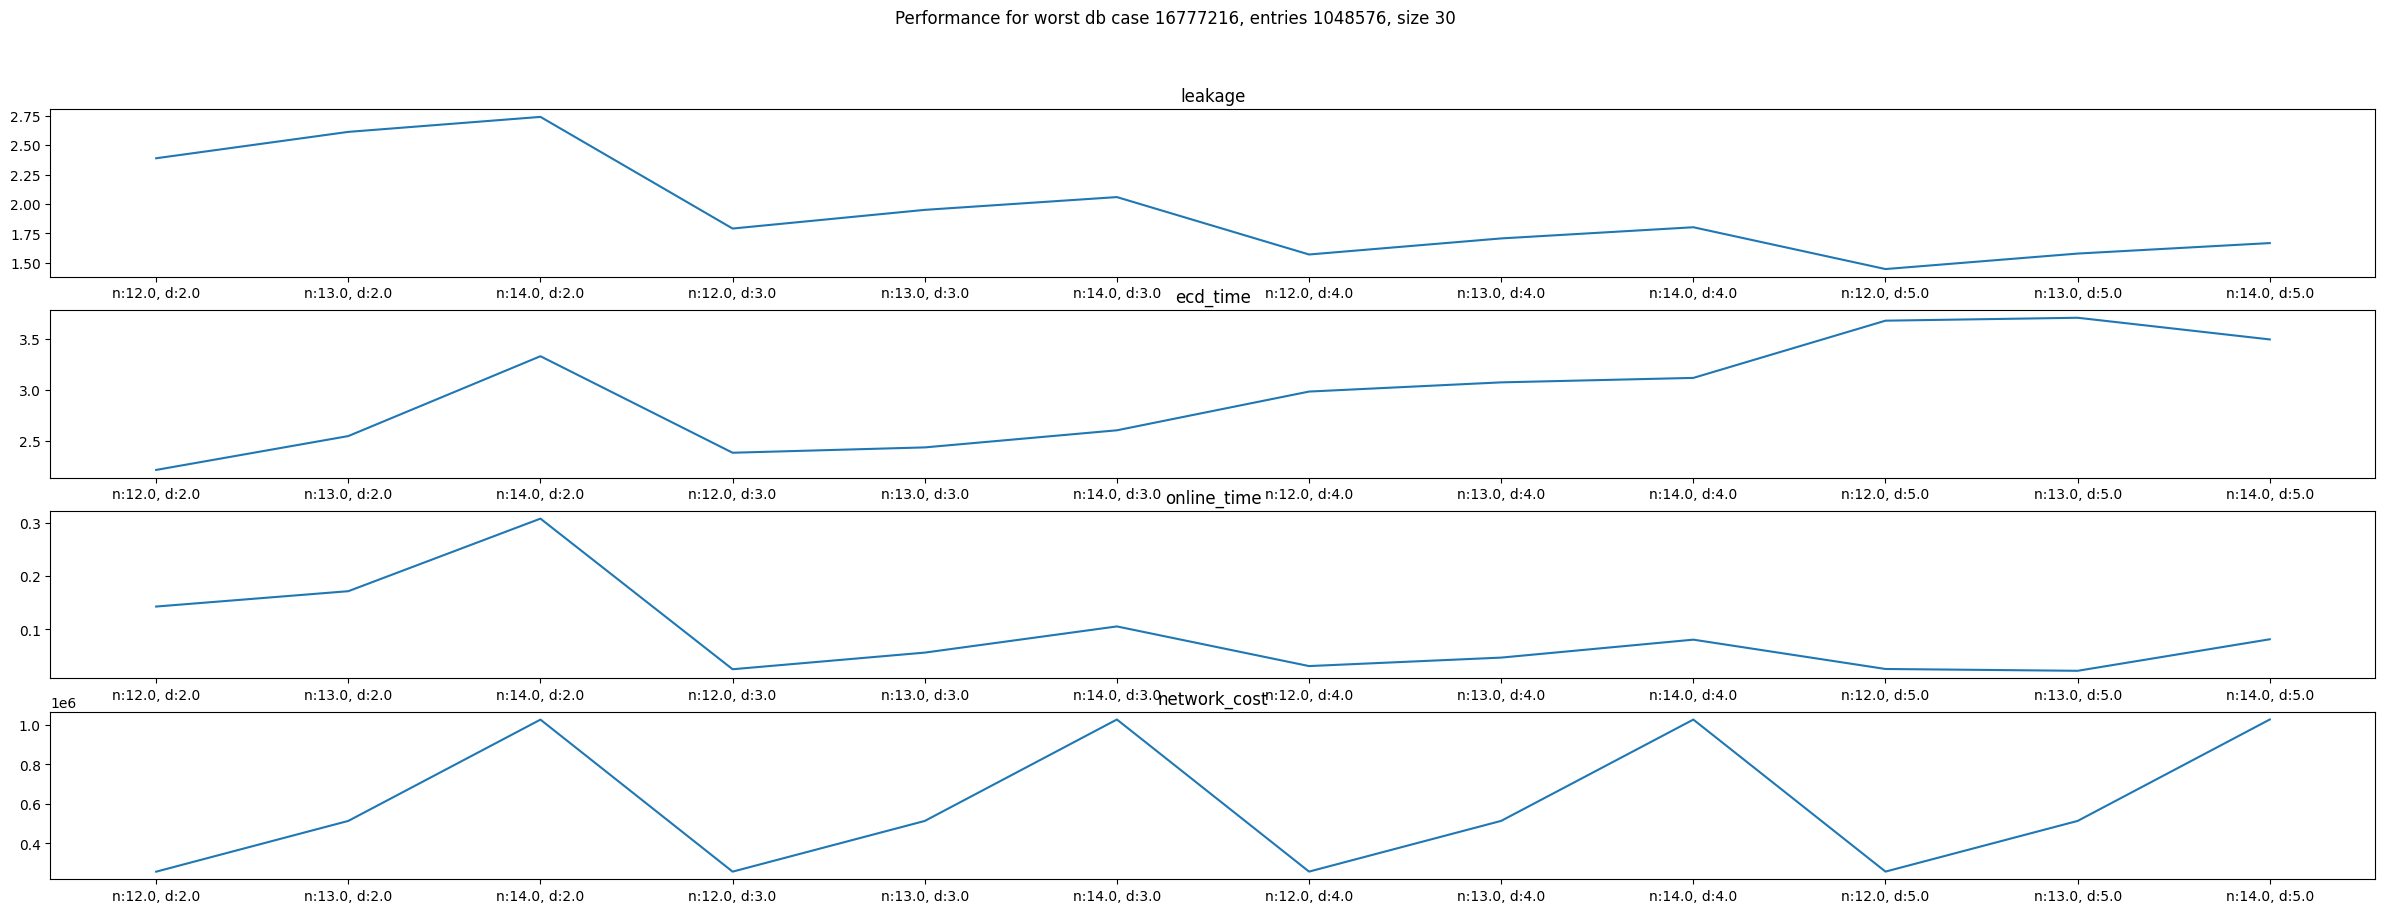

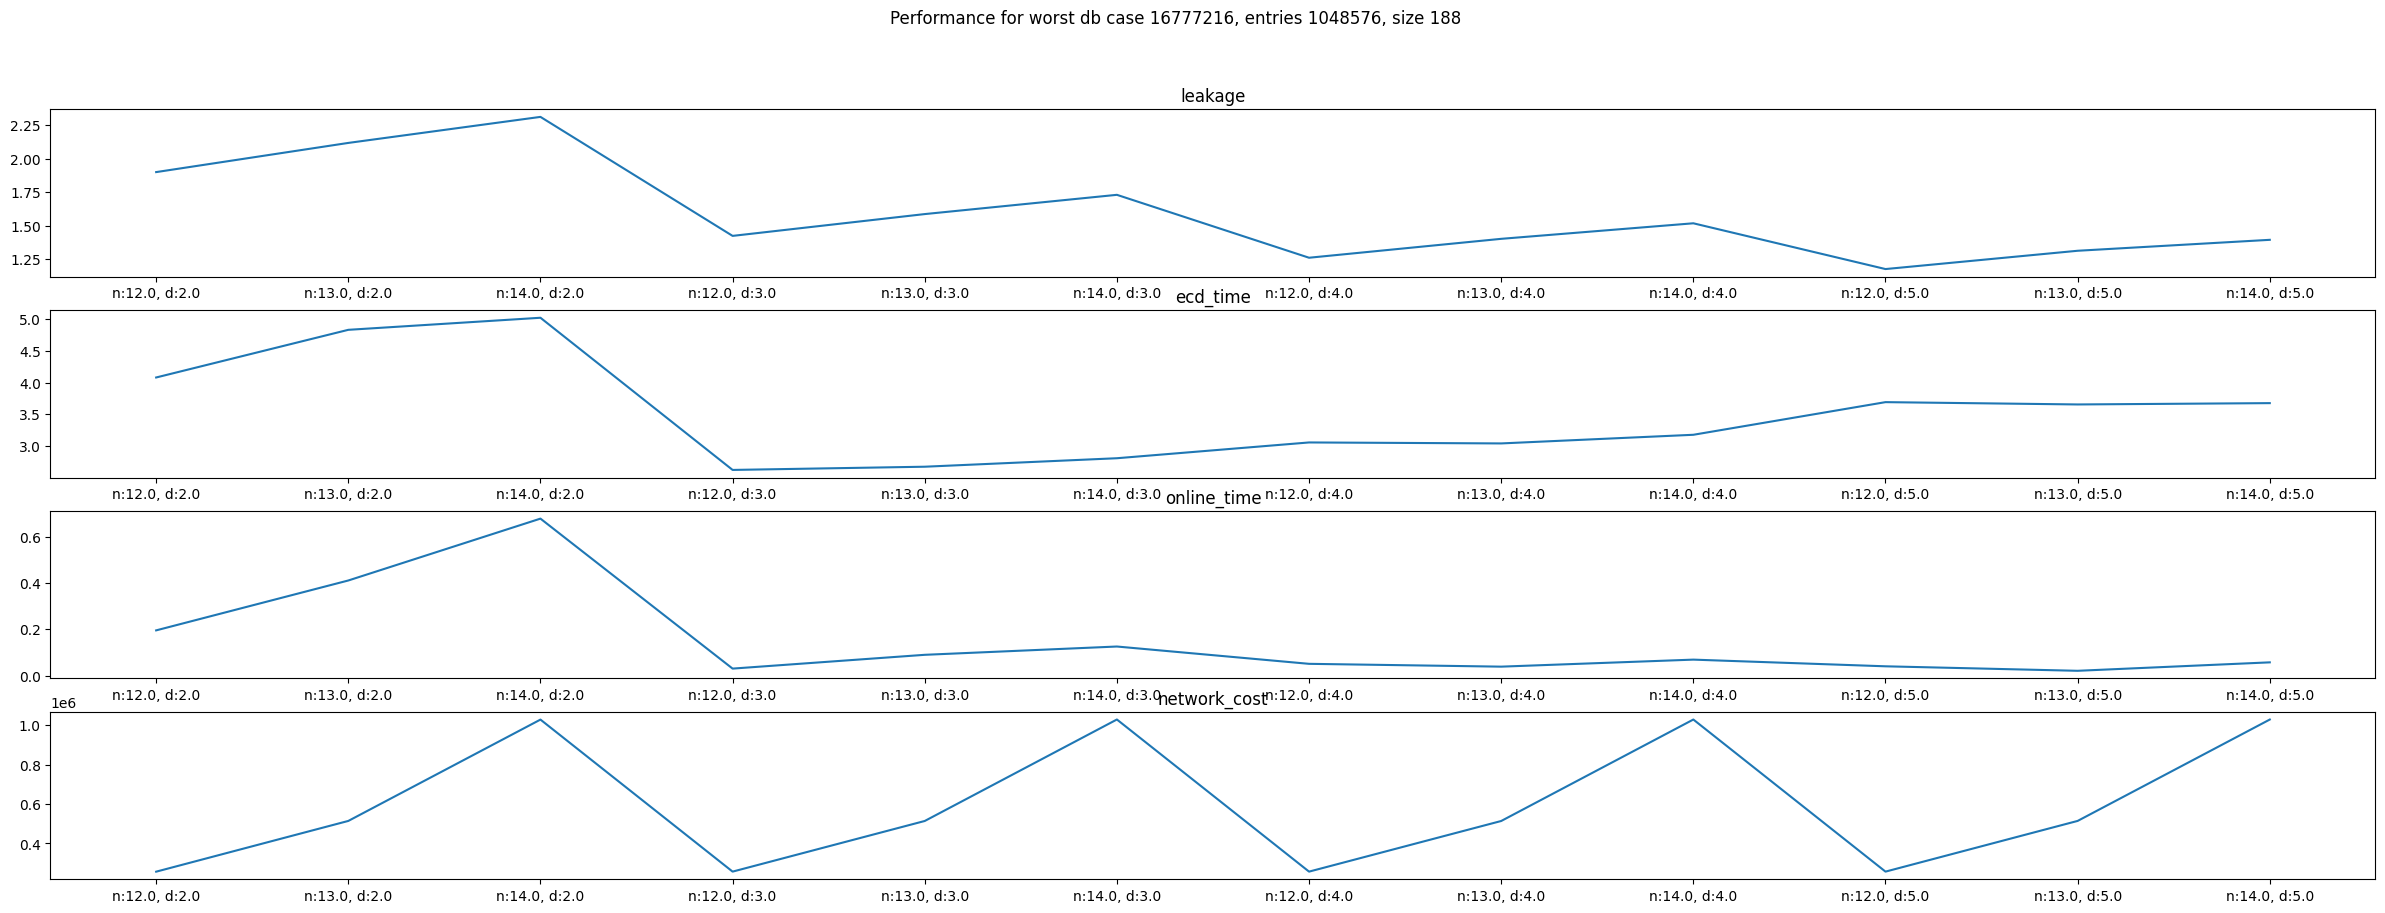

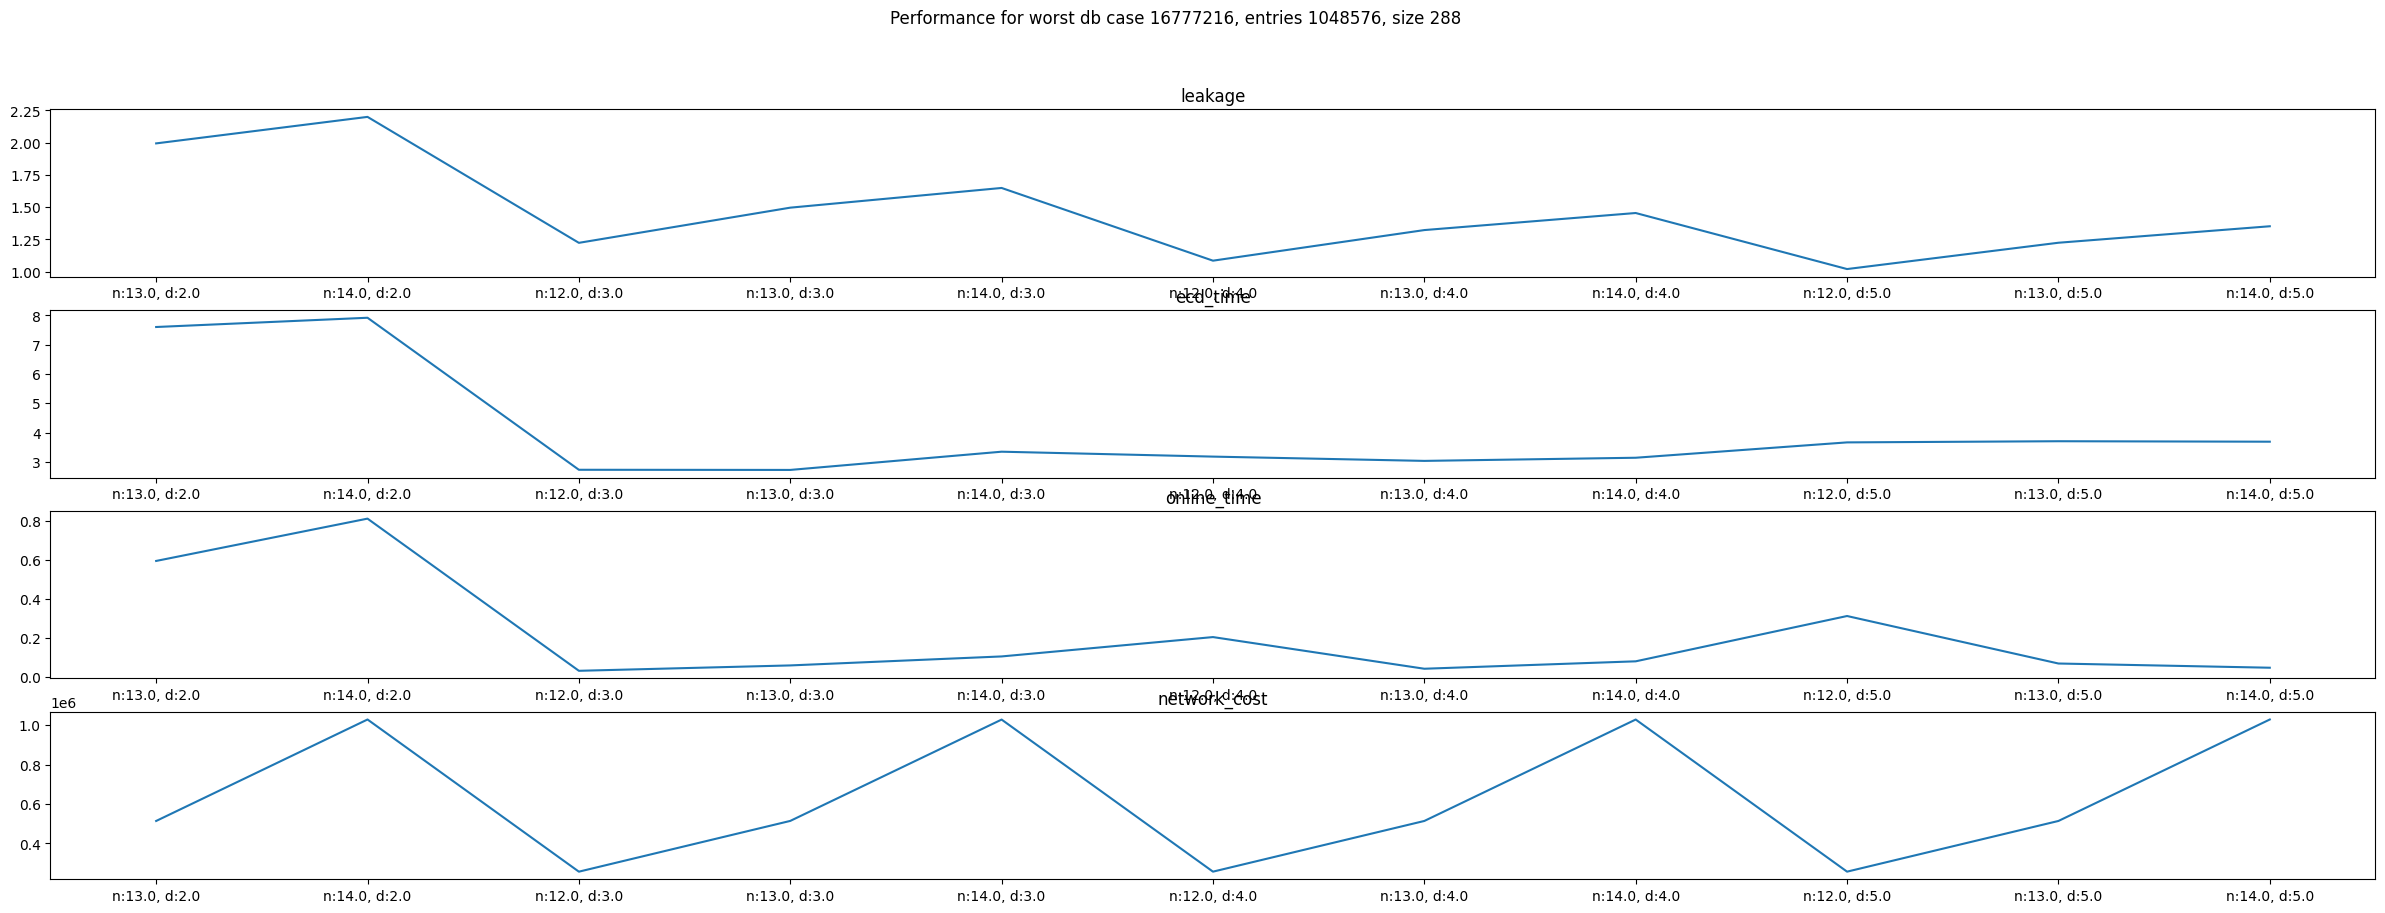

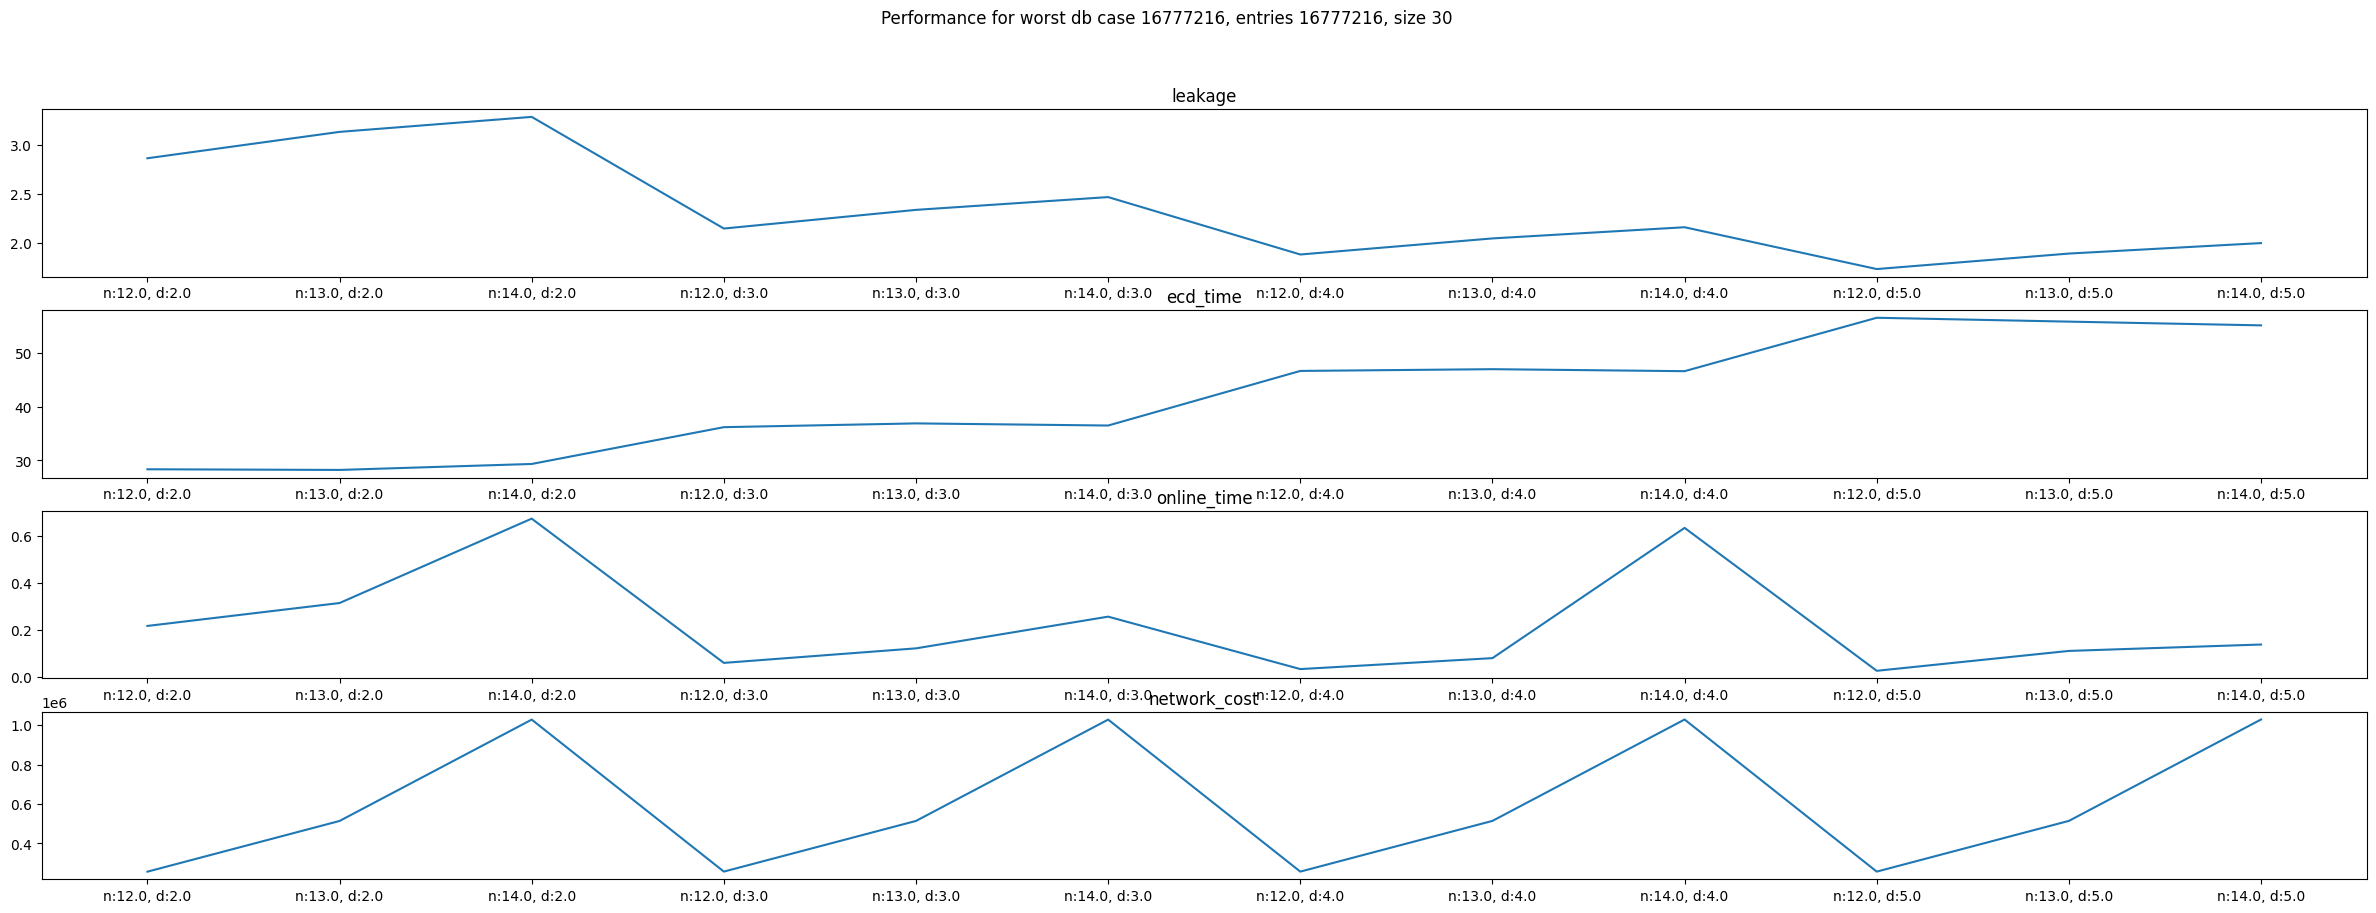

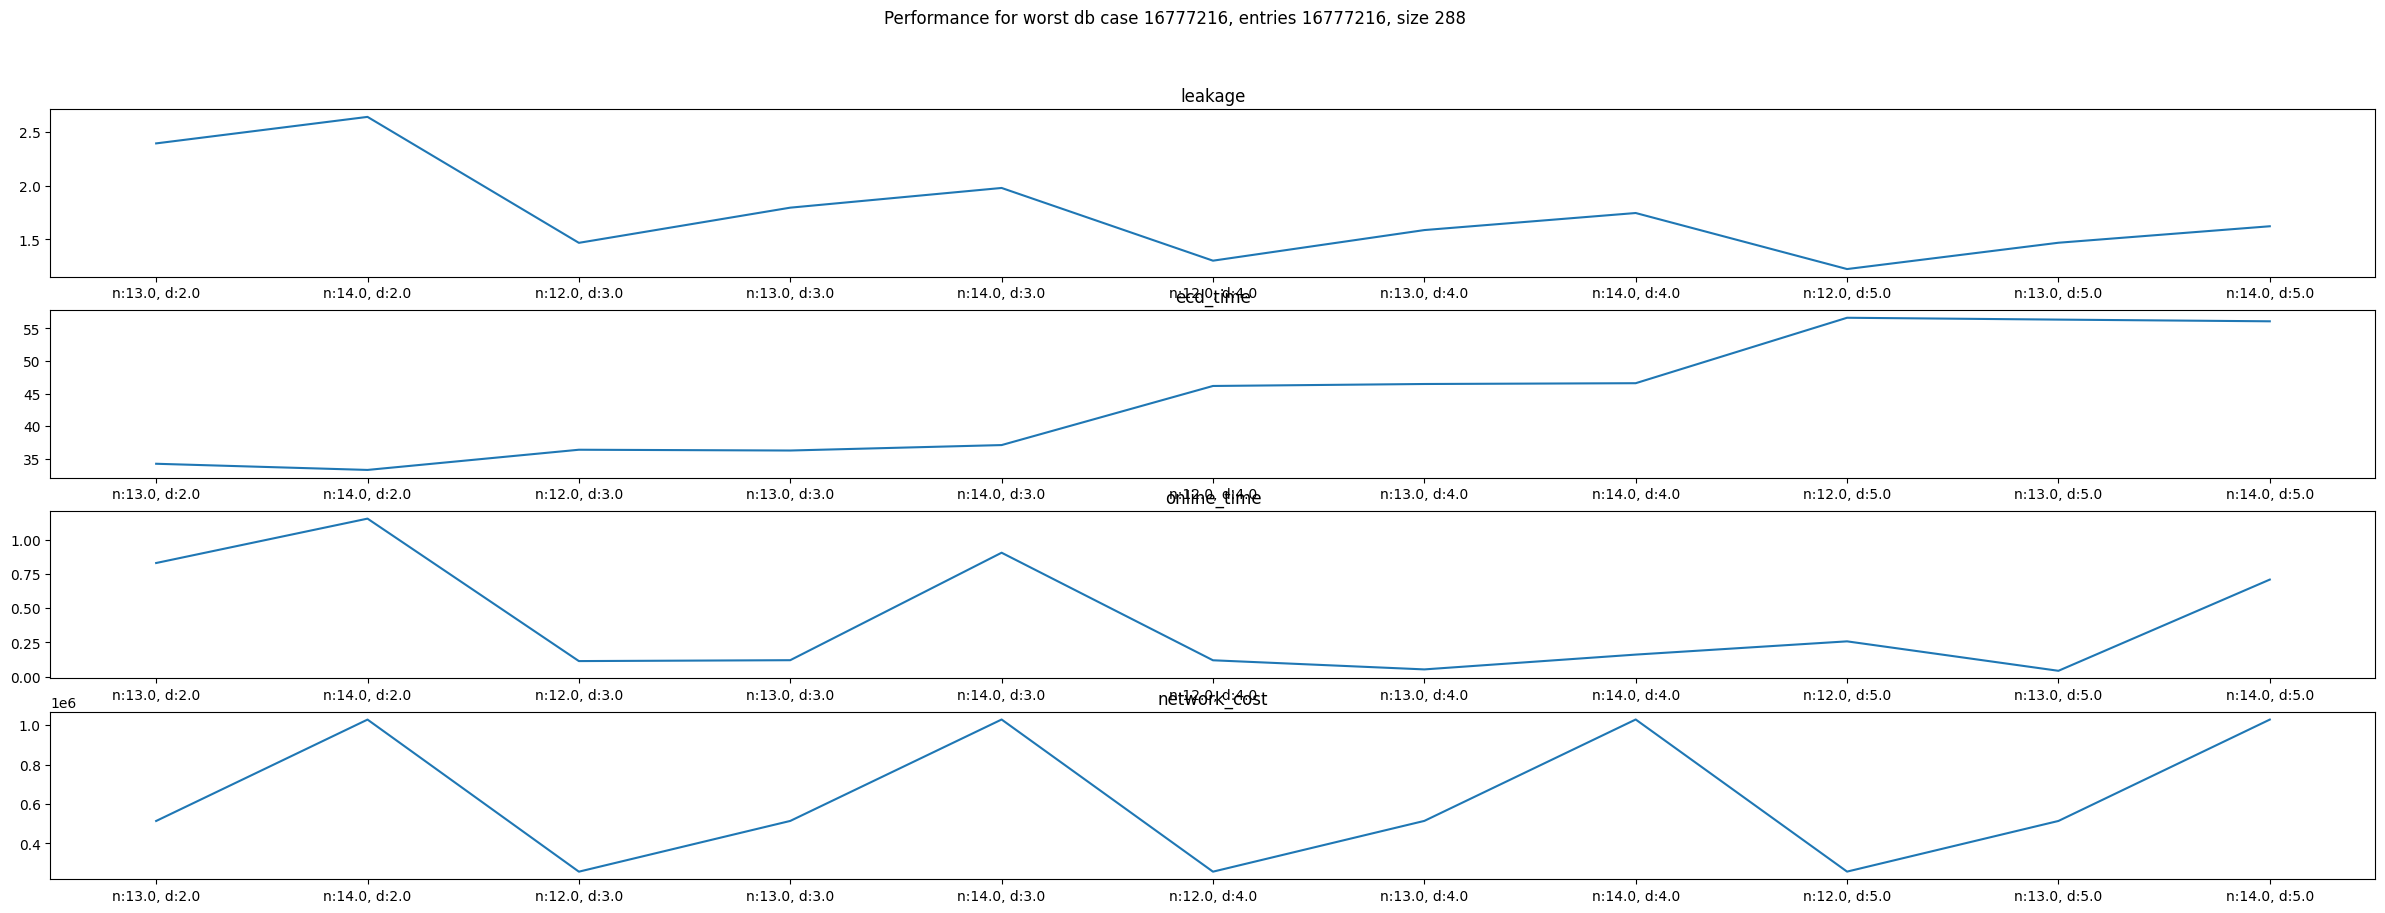

In [64]:
@dataclass
class Performance:
    leakage : float
    ecd_time : float
    online_time : float
    network_cost : float

plt.subplots_adjust(wspace=1, hspace=1.0)
for max_entries in all_max_entries:
    for i,entries in enumerate(all_entries):
        for j,size in enumerate(all_sizes):
            filtered_df = filter_by_attribs(df, ["max_entries", "entries", "size"], [max_entries, entries, size])
            performances = {}
            for _,row in filtered_df.iterrows():
                performances[f"n:{row['n']}, d:{row['d']}"] = Performance(leakage=float(row['informationBits'])/float(row['leakedBits']), ecd_time=row['ecd_time'], online_time=row['online_time'], network_cost=float(row['query_size'])+float(row['answer_size']))
            fig, axs = plt.subplots(4, figsize=(30,10))
            fig.suptitle(f"Performance for worst db case {max_entries}, entries {entries}, size {size}")
            x = [k for k in performances.keys()]
            leakage = [v.leakage for _,v in performances.items()]
            ecd_time = [v.ecd_time for _,v in performances.items()]
            online_time = [v.online_time for _,v in performances.items()]
            network_cost = [v.network_cost for _,v in performances.items()]
            axs[0].set_title("leakage")
            axs[0].plot(x,leakage, label="leakage")
            axs[1].set_title("ecd_time")
            axs[1].plot(x,ecd_time, label="ecd_time")
            axs[2].set_title("online_time")
            axs[2].plot(x,online_time, label="online_time")
            axs[3].set_title("network_cost")
            axs[3].plot(x,network_cost, label="network_cost")
            #axs[i,j].legend()
